# Stonks 

Use tensorflow to build deep learning based time series forcasting models based on financial data.

Try out different neural network architectures, see which one works best for this task.

Keep track of the performance of all of the models.

Read the official Tensorflow time series forecasting [guide](https://www.tensorflow.org/tutorials/structured_data/time_series)

In [104]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import yfinance as yf

In [105]:
mpl.rcParams['figure.figsize'] = (16, 9)

### Dataset

Currently using `yfinance` to access yahoo finance historical data since it is free.

I want a huge dataset with all nasdaq traded stocks. I obtained the symbols using curl.

In [106]:
!curl ftp.nasdaqtrader.com/SymbolDirectory ftp.nasdaqtrader.com/SymbolDirectory/nasdaqtraded.txt > nasdaqtraded.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
curl: (78) RETR response: 550
100  696k  100  696k    0     0  3516k      0 --:--:-- --:--:-- --:--:-- 3516k


In [107]:
nasdaq_traded_df = pd.read_csv('nasdaqtraded.txt', sep='|')

In [108]:
nasdaq_traded_df.head()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
0,Y,A,"Agilent Technologies, Inc. Common Stock",N,,N,100.0,N,NaN,A,A,N
1,Y,AA,Alcoa Corporation Common Stock,N,,N,100.0,N,NaN,AA,AA,N
2,Y,AAA,Listed Funds Trust AAF First Priority CLO Bond...,P,,Y,100.0,N,NaN,AAA,AAA,N
3,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
4,Y,AACG,ATA Creativity Global - American Depositary Sh...,Q,G,N,100.0,N,N,NaN,AACG,N


In [109]:
nasdaq_traded_df.count()

Nasdaq Traded       9045
Symbol              9044
Security Name       9044
Listing Exchange    9044
Market Category     9044
ETF                 9044
Round Lot Size      9044
Test Issue          9044
Financial Status    3644
CQS Symbol          5400
NASDAQ Symbol       9044
NextShares          9044
dtype: int64

In [110]:
nasdaq_traded_etf_df = nasdaq_traded_df[nasdaq_traded_df.ETF == 'Y']

In [111]:
nasdaq_traded_etf_df.head()

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
2,Y,AAA,Listed Funds Trust AAF First Priority CLO Bond...,P,,Y,100.0,N,NaN,AAA,AAA,N
3,Y,AAAU,Perth Mint Physical Gold ETF,P,,Y,100.0,N,NaN,AAAU,AAAU,N
8,Y,AADR,AdvisorShares Dorsey Wright ADR ETF,P,,Y,100.0,N,NaN,AADR,AADR,N
20,Y,AAXJ,iShares MSCI All Country Asia ex Japan Index Fund,Q,G,Y,100.0,N,N,NaN,AAXJ,N
28,Y,ABEQ,Absolute Core Strategy ETF,P,,Y,100.0,N,NaN,ABEQ,ABEQ,N


In [112]:
nasdaq_traded_etf_df.count()

Nasdaq Traded       2230
Symbol              2230
Security Name       2230
Listing Exchange    2230
Market Category     2230
ETF                 2230
Round Lot Size      2230
Test Issue          2230
Financial Status     397
CQS Symbol          1833
NASDAQ Symbol       2230
NextShares          2230
dtype: int64

In [113]:
# tickers = ['SPY', 'AAPL', 'MSFT', 'TSLA', 'TQQQ', 'MS', 'GS', 'AMZN', 'NFLX', 'GOOG', 'XLF', 'WMT', 'GE', 'VZ', 'BAC', 'GLD', 'SLV']
tickers = nasdaq_traded_etf_df['Symbol'].dropna().to_list() + ['TSLA']
tickers

['AAA',
 'AAAU',
 'AADR',
 'AAXJ',
 'ABEQ',
 'ACES',
 'ACIO',
 'ACSG',
 'ACSI',
 'ACT',
 'ACWF',
 'ACWI',
 'ACWV',
 'ACWX',
 'ADFI',
 'ADME',
 'ADRE',
 'AESR',
 'AFIF',
 'AFK',
 'AFLG',
 'AFMC',
 'AFSM',
 'AFTY',
 'AGG',
 'AGGP',
 'AGGY',
 'AGQ',
 'AGT',
 'AGZ',
 'AGZD',
 'AIA',
 'AIEQ',
 'AIIQ',
 'AIQ',
 'AIRR',
 'ALFA',
 'ALTL',
 'ALTS',
 'ALTY',
 'AMCA',
 'AMLP',
 'AMNA',
 'AMND',
 'AMOM',
 'AMZA',
 'ANGL',
 'AOA',
 'AOK',
 'AOM',
 'AOR',
 'ARB',
 'ARCM',
 'ARGT',
 'ARKF',
 'ARKG',
 'ARKK',
 'ARKQ',
 'ARKW',
 'ARMR',
 'ASEA',
 'ASET',
 'ASHR',
 'ASHS',
 'ASHX',
 'AUGZ',
 'AUSF',
 'AVDE',
 'AVDV',
 'AVEM',
 'AVUS',
 'AVUV',
 'AWAY',
 'AWTM',
 'AZAA',
 'AZAL',
 'AZBA',
 'AZBL',
 'BAB',
 'BAPR',
 'BATT',
 'BAUG',
 'BBAX',
 'BBC',
 'BBCA',
 'BBEU',
 'BBH',
 'BBIN',
 'BBJP',
 'BBMC',
 'BBP',
 'BBRE',
 'BBSA',
 'BBUS',
 'BCD',
 'BCI',
 'BDCX',
 'BDCY',
 'BDEC',
 'BDRY',
 'BETZ',
 'BFEB',
 'BFIT',
 'BFOR',
 'BGRN',
 'BIB',
 'BIBL',
 'BICK',
 'BIL',
 'BIS',
 'BIV',
 'BIZD',
 'BJAN',
 'BJK',

In [114]:
def create_yfinance_df(tickers):
    return yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = tickers,

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = '1mo',

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = '1d',

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )


In [115]:
multi_index_column_ticker_df = create_yfinance_df(tickers)

[************          25%                       ]  561 of 2231 completed

Exception in thread Thread-5023:
Traceback (most recent call last):
  File "/Users/alexanderlerma/go/src/github.com/lermsai/notebooks/financial/venv/lib/python3.7/site-packages/urllib3/connection.py", line 160, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/Users/alexanderlerma/go/src/github.com/lermsai/notebooks/financial/venv/lib/python3.7/site-packages/urllib3/util/connection.py", line 61, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.7/lib/python3.7/socket.py", line 748, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 8] nodename nor servname provided, or not known

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/alexanderlerma/go/src/github.com/lermsai/notebooks/financial/v

[*********************100%***********************]  2229 of 2231 completed

KeyboardInterrupt: 

What do the first few entries look like? These should be the oldest.

In [116]:
multi_index_column_ticker_df.head()

RBIN                                                BIS  \
                 Open       High        Low      Close Volume       Open   
Date                                                                       
2020-08-11        NaN        NaN        NaN        NaN    NaN        NaN   
2020-08-12  25.000000  25.108000  25.000000  25.108000  700.0  33.560001   
2020-08-13  25.101000  25.101000  25.101000  25.101000    0.0  32.759998   
2020-08-14  25.002001  25.002001  25.002001  25.002001  100.0  32.599998   
2020-08-17  25.160000  25.160000  25.160000  25.160000    0.0  32.840000   

                                                       ...   NGE              \
                 High        Low      Close    Volume  ...  Open  High   Low   
Date                                                   ...                     
2020-08-11        NaN        NaN        NaN       NaN  ...   NaN   NaN   NaN   
2020-08-12  33.560001  32.720001  32.880001  123000.0  ...  9.06  9.12  9.02   
2020-08-13  33.040001  32.439999  32.720001   81700.0  ...  9.11  9.13  9.10   
2020-08-14  33.320000  32.599998  33.119999   75000.0  ...  9.13  9.14  9.02   
2020-08-17  32.919998  31.639999  31.760000   73400.0  ...  9.14  9.25  9.12   

                                  IVV                                      \
           Close   Volume        Open        High         Low       Close   
Date                                                                        
2020-08-11   NaN      NaN         NaN         NaN         NaN         NaN   
2020-08-12  9.09  28600.0  336.850006  339.640015  336.799988  338.799988   
2020-08-13  9.10  33700.0  338.000000  339.619995  337.179993  338.220001   
2020-08-14  9.12   7900.0  337.760010  338.790009  337.049988  338.190002   
2020-08-17  9.16  19100.0  339.320007  339.720001  338.869995  339.279999   

                       
               Volume  
Date                   
2020-08-11        NaN  
2020-08-12  2907900.0  
2020-08-13  2643200.0  
2020-08-14  1716000.0  
2020-08-17  1642600.0  

[5 rows x 11221 columns]

What do the last few entries look like? These should be the newest.

In [117]:
multi_index_column_ticker_df.tail()

RBIN                                                BIS  \
                 Open       High        Low      Close Volume       Open   
Date                                                                       
2020-09-04  24.775000  24.775000  24.775000  24.775000  100.0  33.990002   
2020-09-08  24.524000  24.524000  24.524000  24.524000  100.0  35.849998   
2020-09-09  24.920000  24.920000  24.912001  24.912001  200.0  35.240002   
2020-09-10  24.686001  24.686001  24.686001  24.686001    0.0  34.450001   
2020-09-11        NaN        NaN        NaN        NaN    NaN  35.290001   

                                                       ...   NGE              \
                 High        Low      Close    Volume  ...  Open  High   Low   
Date                                                   ...                     
2020-09-04  36.490002  33.990002  34.680000  203800.0  ...  9.06  9.11  8.95   
2020-09-08  36.369999  34.860001  36.029999   85500.0  ...  8.66  9.11  8.66   
2020-09-09  35.400002  34.290001  34.669998   74700.0  ...  9.11  9.27  9.10   
2020-09-10  36.020000  33.950001  35.840000   83400.0  ...  9.23  9.26  9.23   
2020-09-11  36.099998  34.610001  35.369999   70502.0  ...  9.20  9.26  9.19   

                                  IVV                                      \
           Close   Volume        Open        High         Low       Close   
Date                                                                        
2020-09-04  9.11  17800.0  347.600006  349.290009  336.260010  343.980011   
2020-09-08  9.10  34400.0  338.049988  339.399994  334.230011  334.630005   
2020-09-09  9.26  30100.0  338.980011  343.890015  337.980011  341.179993   
2020-09-10  9.25   4500.0  343.260010  343.910004  334.209991  335.220001   
2020-09-11  9.20   5719.0  337.119995  338.269989  332.350006  335.380005   

                       
               Volume  
Date                   
2020-09-04  5359400.0  
2020-09-08  5003500.0  
2020-09-09  5378500.0  
2020-09-10  5056900.0  
2020-09-11  3445318.0  

[5 rows x 11221 columns]

In [118]:
multi_index_column_ticker_df.dtypes

RBIN  Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume    float64
                 ...   
IVV   Open      float64
      High      float64
      Low       float64
      Close     float64
      Volume    float64
Length: 11221, dtype: object

Is the data properly indexed by date already for me?

In [119]:
multi_index_column_ticker_df.index

DatetimeIndex(['2020-08-11', '2020-08-12', '2020-08-13', '2020-08-14',
               '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
               '2020-08-21', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28', '2020-08-31', '2020-09-01',
               '2020-09-02', '2020-09-03', '2020-09-04', '2020-09-08',
               '2020-09-09', '2020-09-10', '2020-09-11'],
              dtype='datetime64[ns]', name='Date', freq=None)

Seems like it, I should be able to select date ranges

In [120]:
multi_index_column_ticker_df['2020-08-27':'2020-08-31']

RBIN                                                BIS  \
                 Open       High        Low      Close Volume       Open   
Date                                                                       
2020-08-27  25.118999  25.118999  25.118999  25.118999    0.0  33.009998   
2020-08-28  25.170000  25.170000  25.170000  25.170000  100.0  33.060001   
2020-08-31  25.114000  25.114000  25.114000  25.114000  100.0  33.000000   

                                                       ...   NGE              \
                 High        Low      Close    Volume  ...  Open  High   Low   
Date                                                   ...                     
2020-08-27  33.759998  32.820000  33.250000  136100.0  ...  9.11  9.11  8.99   
2020-08-28  33.630001  33.060001  33.150002  261100.0  ...  9.10  9.11  9.02   
2020-08-31  33.040001  31.590000  31.719999  112100.0  ...  9.08  9.08  9.00   

                                  IVV                                      \
           Close   Volume        Open        High         Low       Close   
Date                                                                        
2020-08-27  8.99  12300.0  349.660004  351.320007  347.980011  349.760010   
2020-08-28  9.08  13200.0  350.890015  352.190002  349.660004  352.000000   
2020-08-31  9.04   4900.0  351.809998  352.769989  350.510010  350.769989   

                       
               Volume  
Date                   
2020-08-27  3767600.0  
2020-08-28  2520700.0  
2020-08-31  5757700.0  

[3 rows x 11221 columns]

In [121]:
multi_index_column_ticker_df.columns

MultiIndex([('RBIN',   'Open'),
            ('RBIN',   'High'),
            ('RBIN',    'Low'),
            ('RBIN',  'Close'),
            ('RBIN', 'Volume'),
            ( 'BIS',   'Open'),
            ( 'BIS',   'High'),
            ( 'BIS',    'Low'),
            ( 'BIS',  'Close'),
            ( 'BIS', 'Volume'),
            ...
            ( 'NGE',   'Open'),
            ( 'NGE',   'High'),
            ( 'NGE',    'Low'),
            ( 'NGE',  'Close'),
            ( 'NGE', 'Volume'),
            ( 'IVV',   'Open'),
            ( 'IVV',   'High'),
            ( 'IVV',    'Low'),
            ( 'IVV',  'Close'),
            ( 'IVV', 'Volume')],
           length=11221)

We see that this dataframe has multi index columns. Accessing an underlying symbol's data in a multi index can be done like this

In [122]:
multi_index_column_ticker_df['2020-08-27':'2020-08-31']['TSLA']

,Open,High,Low,Close,Volume
Date,,,,,
2020-08-27,436.092010,459.119995,428.500000,447.750000,118465000.0
2020-08-28,459.023987,463.697998,437.303986,442.679993,100406000.0
2020-08-31,444.609985,500.140015,440.109985,498.320007,118374400.0


Lets describe some common stats for each feature

In [89]:
multi_index_column_ticker_df.describe().transpose()

count          mean           std           min           25%  \
RBIN Open     21.0  2.505605e+01  2.148608e-01  2.452400e+01  2.499000e+01   
     High     21.0  2.506886e+01  2.222890e-01  2.452400e+01  2.499000e+01   
     Low      21.0  2.504619e+01  2.066484e-01  2.452400e+01  2.499000e+01   
     Close    21.0  2.505852e+01  2.143356e-01  2.452400e+01  2.499000e+01   
     Volume   21.0  7.257143e+03  3.205097e+04  0.000000e+00  0.000000e+00   
...            ...           ...           ...           ...           ...   
IVV  Open     22.0  3.438732e+02  6.577032e+00  3.367300e+02  3.382825e+02   
     High     22.0  3.455945e+02  6.702981e+00  3.382700e+02  3.398275e+02   
     Low      22.0  3.411823e+02  6.299941e+00  3.323500e+02  3.368625e+02   
     Close    22.0  3.434318e+02  6.697519e+00  3.346300e+02  3.386650e+02   
     Volume   22.0  3.520214e+06  1.648031e+06  1.634600e+06  2.068250e+06   

                      50%           75%           max  
RBIN Open    2.511400e+01  2.519000e+01  2.533200e+01  
     High    2.511400e+01  2.525200e+01  2.534100e+01  
     Low     2.511400e+01  2.517000e+01  2.533200e+01  
     Close   2.511400e+01  2.517000e+01  2.534100e+01  
     Volume  1.000000e+02  1.000000e+02  1.471000e+05  
...                   ...           ...           ...  
IVV  Open    3.418300e+02  3.491450e+02  3.573800e+02  
     High    3.439000e+02  3.508125e+02  3.602600e+02  
     Low     3.384450e+02  3.451900e+02  3.549300e+02  
     Close   3.410150e+02  3.484550e+02  3.592400e+02  
     Volume  3.520959e+06  4.753725e+06  7.771400e+06  

[11221 rows x 8 columns]

We know that we currently have a multiindex dataframe, but I want to flatten this into a single flat dataframe so it is easier to work with. We can use `to_flat_index()` on our dataframe's columns to accomplish this.

In [90]:
print(type(multi_index_column_ticker_df.columns))

<class 'pandas.core.indexes.multi.MultiIndex'>


In [91]:
def flatten_multi_index_column_df(df):
    if type(df.columns) is not pd.core.indexes.multi.MultiIndex:
        raise Exception('provided dataframe does not have multiindex columns')
    tuple_column_flattener = lambda tup: f'{tup[0].lower()}_{tup[1].lower()}'
    flattened_columns = df.columns.to_flat_index().map(tuple_column_flattener)
    flattened_df = df.copy() # I don't like mutating the original dataframe, yes this more memory intensive
    flattened_df.columns = flattened_columns
    return flattened_df

In [92]:
flattened_df = flatten_multi_index_column_df(multi_index_column_ticker_df)

In [93]:
flattened_df.head()

,rbin_open,rbin_high,rbin_low,rbin_close,rbin_volume,bis_open,bis_high,bis_low,bis_close,bis_volume,...,nge_open,nge_high,nge_low,nge_close,nge_volume,ivv_open,ivv_high,ivv_low,ivv_close,ivv_volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-12,25.000000,25.108000,25.000000,25.108000,700.0,33.560001,33.560001,32.720001,32.880001,123000.0,...,9.06,9.12,9.02,9.09,28600.0,336.850006,339.640015,336.799988,338.799988,2907900.0
2020-08-13,25.101000,25.101000,25.101000,25.101000,0.0,32.759998,33.040001,32.439999,32.720001,81700.0,...,9.11,9.13,9.10,9.10,33700.0,338.000000,339.619995,337.179993,338.220001,2643200.0
2020-08-14,25.002001,25.002001,25.002001,25.002001,100.0,32.599998,33.320000,32.599998,33.119999,75000.0,...,9.13,9.14,9.02,9.12,7900.0,337.760010,338.790009,337.049988,338.190002,1716000.0
2020-08-17,25.160000,25.160000,25.160000,25.160000,0.0,32.840000,32.919998,31.639999,31.760000,73400.0,...,9.14,9.25,9.12,9.16,19100.0,339.320007,339.720001,338.869995,339.279999,1642600.0


In [94]:
flattened_df.tail()

,rbin_open,rbin_high,rbin_low,rbin_close,rbin_volume,bis_open,bis_high,bis_low,bis_close,bis_volume,...,nge_open,nge_high,nge_low,nge_close,nge_volume,ivv_open,ivv_high,ivv_low,ivv_close,ivv_volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-04,24.775000,24.775000,24.775000,24.775000,100.0,33.990002,36.490002,33.990002,34.680000,203800.0,...,9.06,9.11,8.95,9.11,17800.0,347.600006,349.290009,336.260010,343.980011,5359400.0
2020-09-08,24.524000,24.524000,24.524000,24.524000,100.0,35.849998,36.369999,34.860001,36.029999,85500.0,...,8.66,9.11,8.66,9.10,34400.0,338.049988,339.399994,334.230011,334.630005,5003500.0
2020-09-09,24.920000,24.920000,24.912001,24.912001,200.0,35.240002,35.400002,34.290001,34.669998,74700.0,...,9.11,9.27,9.10,9.26,30100.0,338.980011,343.890015,337.980011,341.179993,5378500.0
2020-09-10,24.686001,24.686001,24.686001,24.686001,0.0,34.450001,36.020000,33.950001,35.840000,83400.0,...,9.23,9.26,9.23,9.25,4500.0,343.260010,343.910004,334.209991,335.220001,5056900.0
2020-09-11,NaN,NaN,NaN,NaN,NaN,35.290001,36.099998,34.610001,35.369999,70502.0,...,9.20,9.26,9.19,9.20,5719.0,337.119995,338.269989,332.350006,335.380005,3445318.0


In [95]:
flattened_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rbin_open,21.0,2.505605e+01,2.148608e-01,2.452400e+01,2.499000e+01,2.511400e+01,2.519000e+01,2.533200e+01
rbin_high,21.0,2.506886e+01,2.222890e-01,2.452400e+01,2.499000e+01,2.511400e+01,2.525200e+01,2.534100e+01
rbin_low,21.0,2.504619e+01,2.066484e-01,2.452400e+01,2.499000e+01,2.511400e+01,2.517000e+01,2.533200e+01
rbin_close,21.0,2.505852e+01,2.143356e-01,2.452400e+01,2.499000e+01,2.511400e+01,2.517000e+01,2.534100e+01
rbin_volume,21.0,7.257143e+03,3.205097e+04,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+02,1.471000e+05
...,...,...,...,...,...,...,...,...
ivv_open,22.0,3.438732e+02,6.577032e+00,3.367300e+02,3.382825e+02,3.418300e+02,3.491450e+02,3.573800e+02
ivv_high,22.0,3.455945e+02,6.702981e+00,3.382700e+02,3.398275e+02,3.439000e+02,3.508125e+02,3.602600e+02
ivv_low,22.0,3.411823e+02,6.299941e+00,3.323500e+02,3.368625e+02,3.384450e+02,3.451900e+02,3.549300e+02
ivv_close,22.0,3.434318e+02,6.697519e+00,3.346300e+02,3.386650e+02,3.410150e+02,3.484550e+02,3.592400e+02


Now we have a dataset with flattened columns, but clearly there are `NaN` values for many of head values. This makes sense because some tickers have been trading longer than others, so they have more history. It is also clear that tickers listed more recently will have less historical data to work with.

For now I do not want to deal with choosing a way to interpolate these historical NaNs. I want a complete dataset to work with right now. I want to determine the first trading date that all of my selected tickers were trading at the same time. This is a simple straight forward approach, but the dataset will be trimmed to the first full valid trading date for this dataset.

In [135]:
first_valid_index_df = flattened_df.apply(pd.Series.first_valid_index)

In [136]:
first_valid_index_df.head()

rbin_open     2020-08-12
rbin_high     2020-08-12
rbin_low      2020-08-12
rbin_close    2020-08-12
rbin_volume   2020-08-12
dtype: datetime64[ns]

The first date that has values for all data would be the first day all of the tickers were trading together. We can determine this date by using the max of the `first_valid_index_df`.

In [133]:
first_valid_trading_date = max(first_valid_index_df)

In [134]:
first_valid_trading_date

Timestamp('2020-09-08 00:00:00')

In [50]:
valid_trading_date_flattened_df = flattened_df[first_valid_trading_date:]

In [51]:
valid_trading_date_flattened_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
teqi_open,21.0,25.534476,0.291503,25.000000,25.379999,25.530001,25.700001,26.090000
teqi_high,21.0,25.599619,0.283720,25.129999,25.469999,25.625000,25.785999,26.090000
teqi_low,21.0,25.453429,0.295695,24.802999,25.267000,25.510000,25.610001,26.020000
teqi_close,21.0,25.507714,0.313200,24.802999,25.426001,25.521000,25.680000,26.034000
teqi_volume,21.0,2104.761905,2711.913751,100.000000,600.000000,1000.000000,2600.000000,11900.000000
...,...,...,...,...,...,...,...,...
stlg_open,21.0,28.526905,0.804806,27.316000,27.920000,28.287001,29.250000,30.040001
stlg_high,21.0,28.608809,0.776140,27.316000,28.080999,28.500000,29.250000,30.190001
stlg_low,21.0,28.491191,0.784892,27.316000,27.920000,28.287001,29.218000,30.010000
stlg_close,21.0,28.566238,0.761181,27.316000,28.080999,28.459999,29.218000,30.149000


find all rows that contain `NaN` values still

In [65]:
valid_trading_date_flattened_df[valid_trading_date_flattened_df.isnull().any(axis=1)]

,resd_open,resd_high,resd_low,resd_close,resd_volume,emdv_open,emdv_high,emdv_low,emdv_close,emdv_volume,...,psep_open,psep_high,psep_low,psep_close,psep_volume,szk_open,szk_high,szk_low,szk_close,szk_volume
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-10,26.01,26.01,25.722,25.722,2300.0,51.029999,51.029999,50.435001,50.435001,400.0,...,26.52,26.52,26.075001,26.190001,516900.0,12.89,13.23,12.83,13.23,800.0


What happened on `2012-10-29`?

[hurricane-sandy-stock-markets](https://money.cnn.com/2012/10/29/investing/hurricane-sandy-stock-markets/index.html)

In [82]:
final_flattened_df = valid_trading_date_flattened_df.dropna(axis=0)

KeyError: "['2020-09-10'] not found in axis"

In [78]:
final_flattened_df.count()

resd_open      0
resd_high      0
resd_low       0
resd_close     0
resd_volume    0
              ..
szk_open       0
szk_high       0
szk_low        0
szk_close      0
szk_volume     0
Length: 11309, dtype: int64

In [75]:
assert(len(final_flattened_df[final_flattened_df.isnull().any(axis=1)]) == 0)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

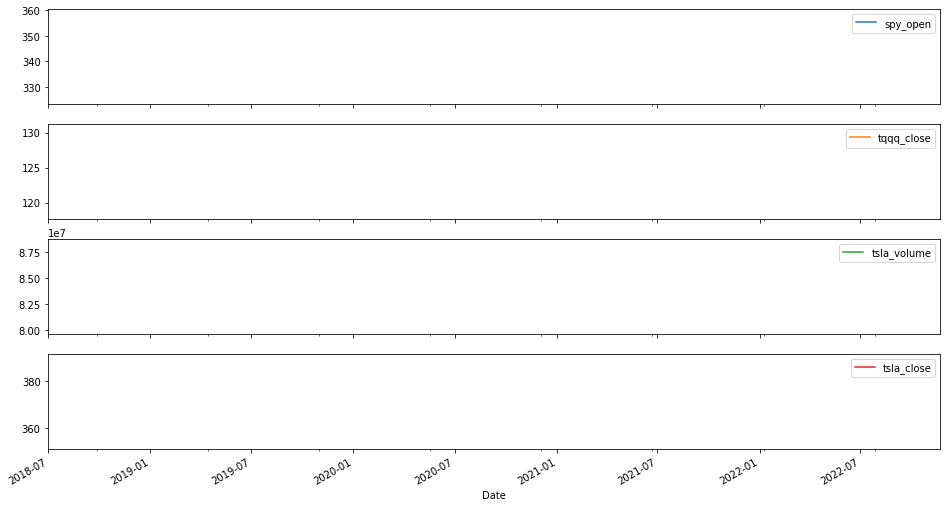

In [76]:
final_flattened_df[['spy_open', 'tqqq_close', 'tsla_volume', 'tsla_close']].plot(subplots=True)

In [31]:
df = final_flattened_df.copy()

### Feature Engineering

#### Time

We want to account for seasonality in prices. We can map our `date` index feature datetimes into useable signals using sin and cos.

In [32]:
index_timestamp_seconds = np.array(df.index.map(datetime.datetime.timestamp))
index_timestamp_seconds

array([1.2777840e+09, 1.2778704e+09, 1.2779568e+09, ..., 1.5995376e+09,
       1.5996240e+09, 1.5997104e+09])

In [33]:
seconds_per_day = 24 * 60 * 60
seconds_per_year = 365.2425 * seconds_per_day
date_to_year_sin = np.sin(index_timestamp_seconds * (2 * np.pi / seconds_per_year))
date_to_year_cos = np.cos(index_timestamp_seconds * (2 * np.pi / seconds_per_year))

Text(0.5, 1.0, 'Time of year signal')

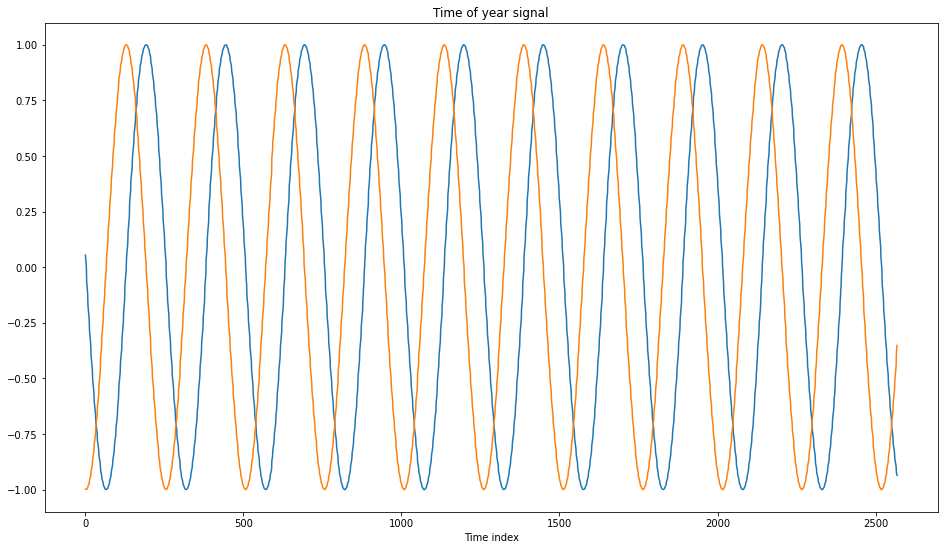

In [34]:
plt.plot(np.array(date_to_year_sin))
plt.plot(np.array(date_to_year_cos))
plt.xlabel('Time index')
plt.title('Time of year signal')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

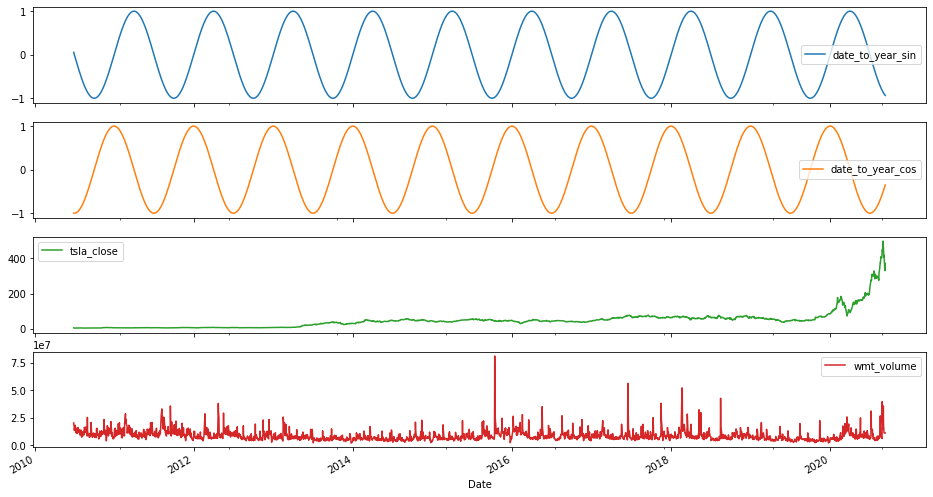

In [35]:
df['date_to_year_sin'] = date_to_year_sin
df['date_to_year_cos'] = date_to_year_cos
df[['date_to_year_sin', 'date_to_year_cos', 'tsla_close', 'wmt_volume']].plot(subplots=True)

### Split the data

We'll use a (70%, 20%, 10%) split for the training, validation, and test sets. Note the data is not being randomly shuffled before splitting. This is for two reasons.

It ensures that chopping the data into windows of consecutive samples is still possible.
It ensures that the validation/test results are more realistic, being evaluated on data collected after the model was trained.

In [36]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

### Normalize the data

It is important to scale features before training a neural network. Normalization is a common way of doing this scaling. Subtract the mean and divide by the standard deviation of each feature.

The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

It's also arguable that the model shouldn't have access to future values in the training set when training, and that this normalization should be done using moving averages. That's not the focus of this tutorial, and the validation and test sets ensure that we get (somewhat) honest metrics. So in the interest of simplicity this tutorial uses a simple average.

In [37]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

We can use a [violin plot](https://en.wikipedia.org/wiki/Violin_plot) to visualize the probability density of the data at different values. Using a [seaborn violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

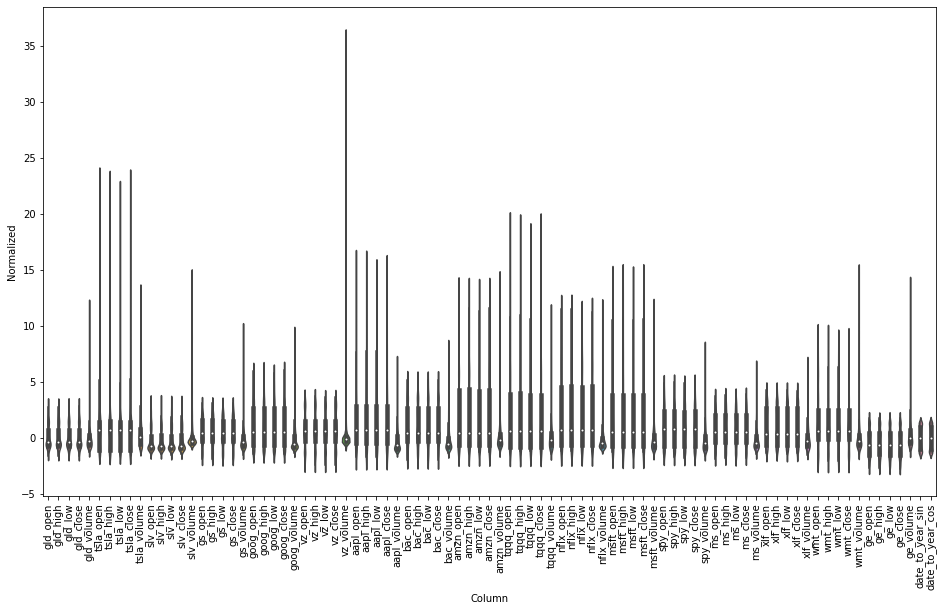

In [38]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure()
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

## Data windowing

The models in this tutorial will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

* The width (number of time steps) of the input and label windows
* The time offset between them.
* Which features are used as inputs, labels, or both. 

This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

* *Single-output*, and *multi-output* predictions.
* *Single-time-step* and *multi-time-step* predictions.

This section focuses on implementing the data windowing so that it can be reused for all of those models.

In [39]:
class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
        self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'
        ])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    
    def plot(self, model=None, plot_col='tsla_close', max_subplots=3):
        inputs, labels = self.example
        plt.figure()
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [date]')
    
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
          data=data,
          targets=None,
          sequence_length=self.total_window_size,
          sequence_stride=1,
          shuffle=True,
          batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    @property
    def train(self):
        return self.make_dataset(self.train_df)

    @property
    def val(self):
        return self.make_dataset(self.val_df)

    @property
    def test(self):
        return self.make_dataset(self.test_df)

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

### Single step models



In [40]:
label_columns = ['tsla_close']

In [41]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=label_columns)
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['tsla_close']

In [42]:
for example_inputs, example_labels in single_step_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 87)
Labels shape (batch, time, features): (32, 1, 1)


#### baseline model

Need something simple to compare more complex models against

In [43]:
class Baseline(tf.keras.Model):
    def __init__(self, label_index=None):
        super().__init__()
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            return inputs
        result = inputs[:, :, self.label_index]
        return result[:, :, tf.newaxis]

In [44]:
baseline = Baseline(label_index=column_indices[label_columns[0]])
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

17/17 [==============================] - 0s 2ms/step - loss: 0.0088 - mean_absolute_error: 0.0660


In [45]:
wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1,
    label_columns=label_columns)

wide_window

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [1 2 3 4 5 6 7]
Label column name(s): ['tsla_close']

In [46]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', baseline(single_step_window.example[0]).shape)

Input shape: (32, 1, 87)
Output shape: (32, 1, 1)


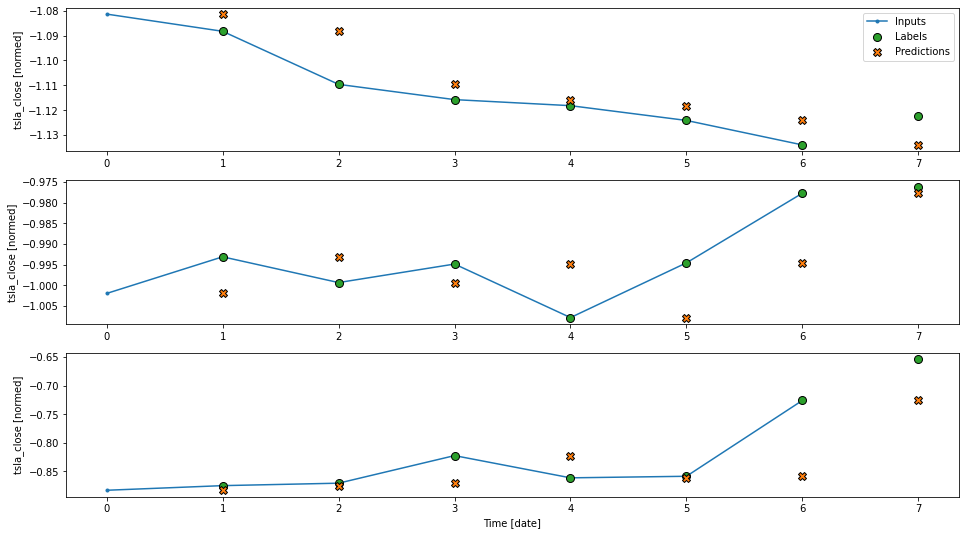

In [47]:
wide_window.plot(baseline)

In [48]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [49]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 87)
Output shape: (32, 1, 1)


In [50]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

    model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

    history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
    return history

In [51]:
%%time
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
57/57 [==============================] - 0s 6ms/step - loss: 0.4144 - mean_absolute_error: 0.4930 - val_loss: 0.3494 - val_mean_absolute_error: 0.4856
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.2245 - mean_absolute_error: 0.3592 - val_loss: 0.2838 - val_mean_absolute_error: 0.4329
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1518 - mean_absolute_error: 0.2929 - val_loss: 0.2436 - val_mean_absolute_error: 0.4111
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.1067 - mean_absolute_error: 0.2437 - val_loss: 0.1267 - val_mean_absolute_error: 0.2895
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0760 - mean_absolute_error: 0.2046 - val_loss: 0.1288 - val_mean_absolute_error: 0.2986
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0547 - mean_absolute_error: 0.1735 - val_loss: 0.0960 - val_mean_absolute_error: 0.2570
Epoch 7/50
57/57 [==========

In [52]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 7, 87)
Output shape: (32, 7, 1)


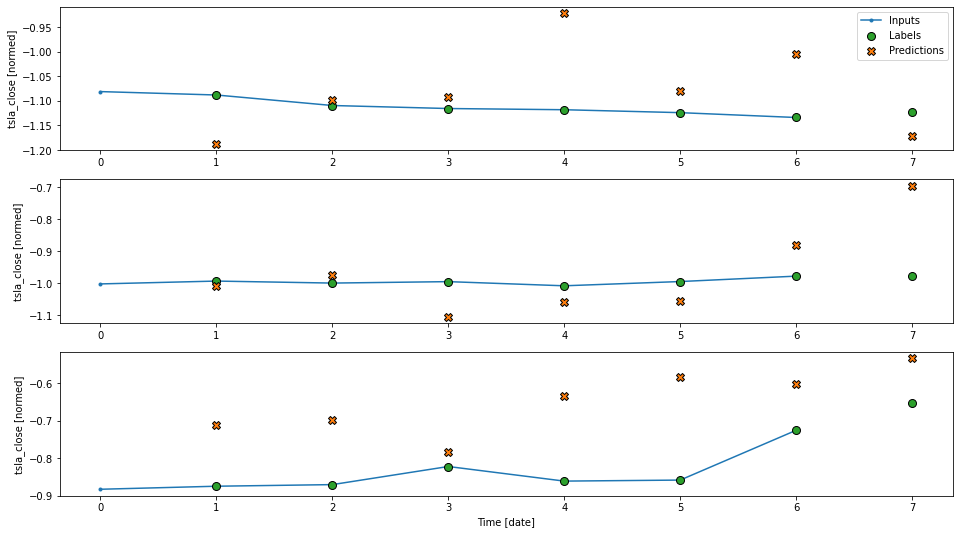

In [53]:
wide_window.plot(linear)

One advantage to linear models is that they're relatively simple to interpret. You can pull out the layer's weights, and see the weight assigned to each input:

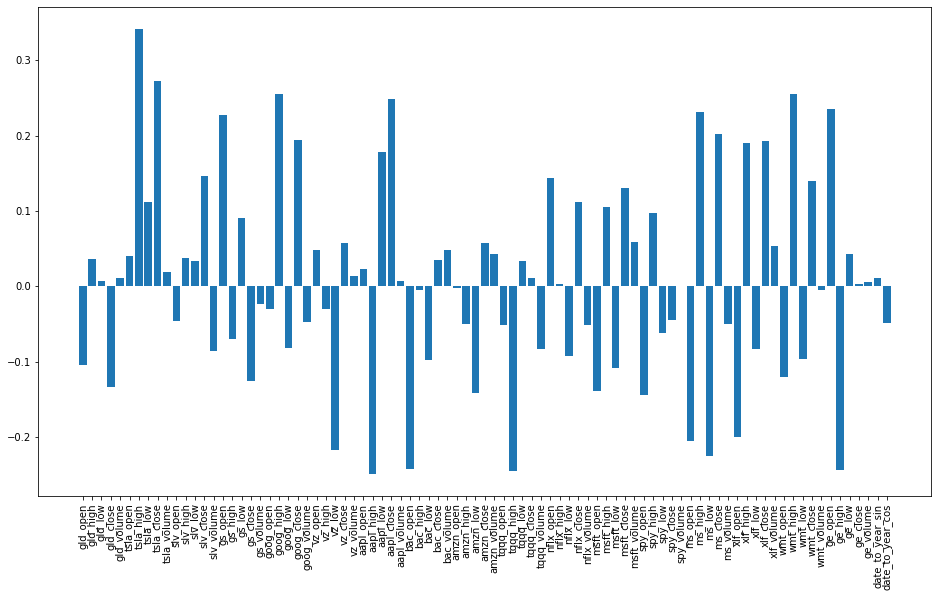

In [54]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

Sometimes the model doesn't even place the most weight on the input `tsla_close`. This is one of the risks of random initialization.

### Dense

In [55]:
%%time
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test)

Epoch 1/50
57/57 [==============================] - 0s 9ms/step - loss: 0.2317 - mean_absolute_error: 0.3225 - val_loss: 0.8209 - val_mean_absolute_error: 0.7616
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 0.0313 - mean_absolute_error: 0.1332 - val_loss: 0.8796 - val_mean_absolute_error: 0.7841
Epoch 3/50
8/8 [==============================] - 0s 956us/step - loss: 28.7263 - mean_absolute_error: 3.6570
CPU times: user 3.19 s, sys: 567 ms, total: 3.76 s
Wall time: 2.14 s


#### Multi-step dense

In [56]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=label_columns)

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['tsla_close']

Text(0.5, 1.0, 'Given 3 days as input, predict 1 day into the future.')

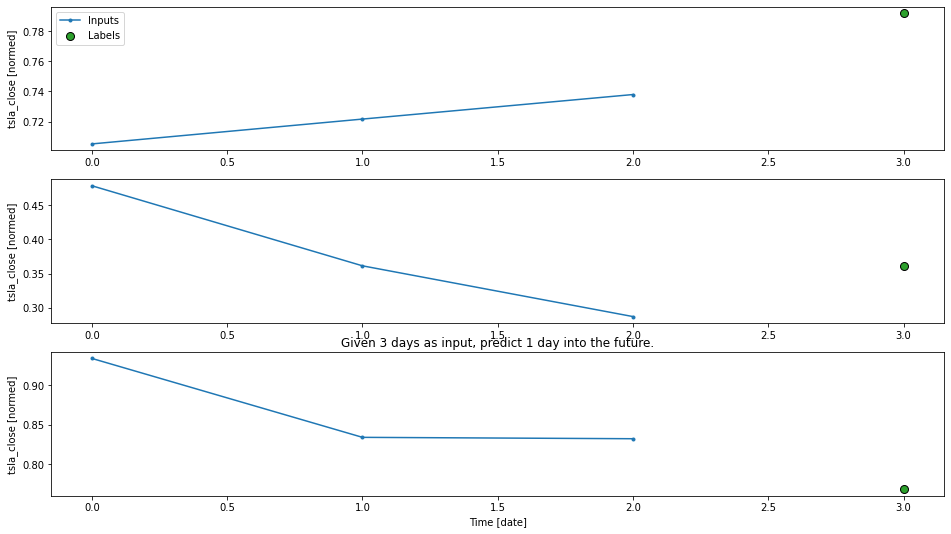

In [57]:
conv_window.plot()
plt.title("Given 3 days as input, predict 1 day into the future.")

You could train a dense model on a multiple-input-step window by adding a layers.Flatten as the first layer of the model

In [58]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [59]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 3, 87)
Output shape: (32, 1, 1)


In [60]:
%%time
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test)

8/8 [==============================] - 0s 1ms/step - loss: 5.1495 - mean_absolute_error: 1.6829
CPU times: user 5.07 s, sys: 995 ms, total: 6.06 s
Wall time: 3.08 s


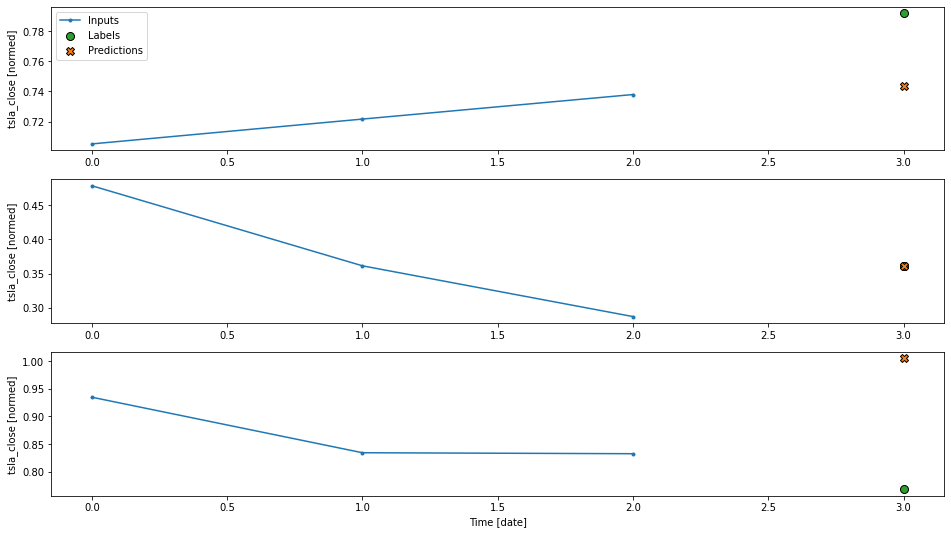

In [61]:
conv_window.plot(multi_step_dense)

The main down-side of this approach is that the resulting model can only be executed on input wndows of exactly this shape.

In [62]:
print('Input shape:', wide_window.example[0].shape)
try:
    print('Output shape:', multi_step_dense(wide_window.example[0]).shape)
except Exception as e:
    print(f'\n{type(e).__name__}:{e}')

Input shape: (32, 7, 87)

InvalidArgumentError:Matrix size-incompatible: In[0]: [32,609], In[1]: [261,32] [Op:MatMul]


### Convolution neural network

In [63]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [64]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 3, 87)
Output shape: (32, 1, 1)


In [65]:
%%time
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

16/16 [==============================] - 0s 2ms/step - loss: 2.6128 - mean_absolute_error: 1.4231
CPU times: user 6.21 s, sys: 1.31 s, total: 7.53 s
Wall time: 3.45 s


In [66]:
print("Wide window")
print('Input shape:', wide_window.example[0].shape)
print('Labels shape:', wide_window.example[1].shape)
print('Output shape:', conv_model(wide_window.example[0]).shape)

Wide window
Input shape: (32, 7, 87)
Labels shape: (32, 7, 1)
Output shape: (32, 5, 1)


In [67]:
LABEL_WIDTH = 7
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=label_columns)

wide_conv_window

Total window size: 10
Input indices: [0 1 2 3 4 5 6 7 8]
Label indices: [3 4 5 6 7 8 9]
Label column name(s): ['tsla_close']

In [68]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 9, 87)
Labels shape: (32, 7, 1)
Output shape: (32, 7, 1)


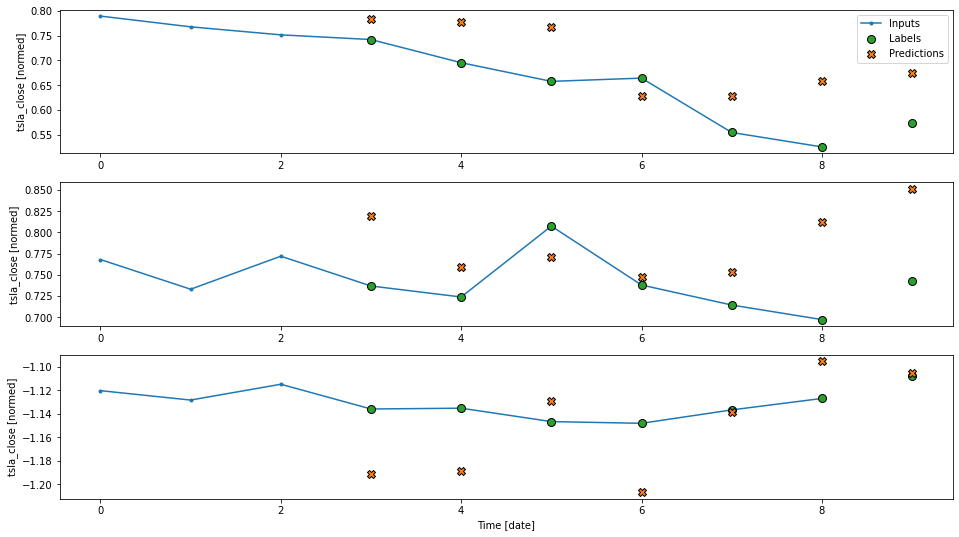

In [69]:
wide_conv_window.plot(conv_model)

### Recurrent neural network

In [70]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [71]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 7, 87)
Output shape: (32, 7, 1)


In [72]:
%%time
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test)

8/8 [==============================] - 0s 1ms/step - loss: 35.0887 - mean_absolute_error: 3.9399
CPU times: user 12.5 s, sys: 2.69 s, total: 15.2 s
Wall time: 7.3 s


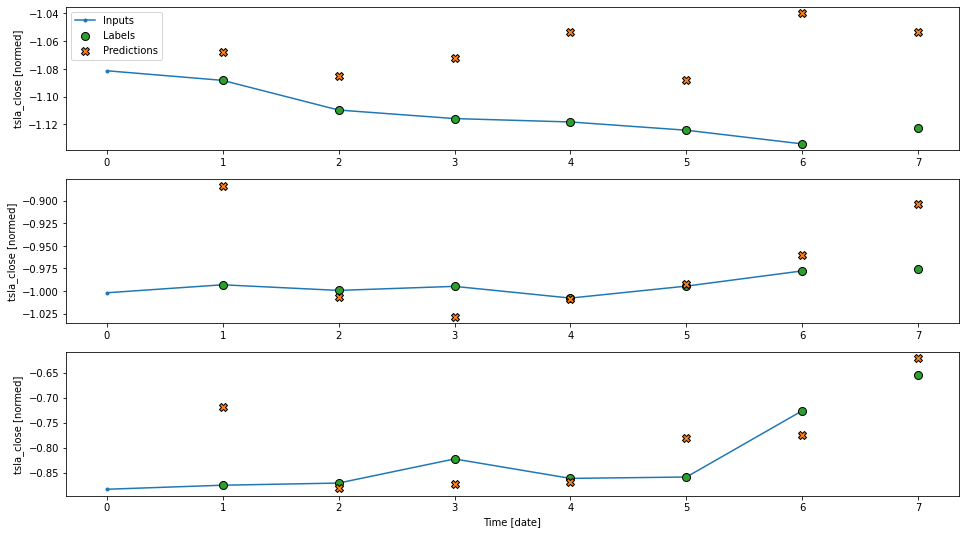

In [73]:
wide_window.plot(lstm_model)

### Performance

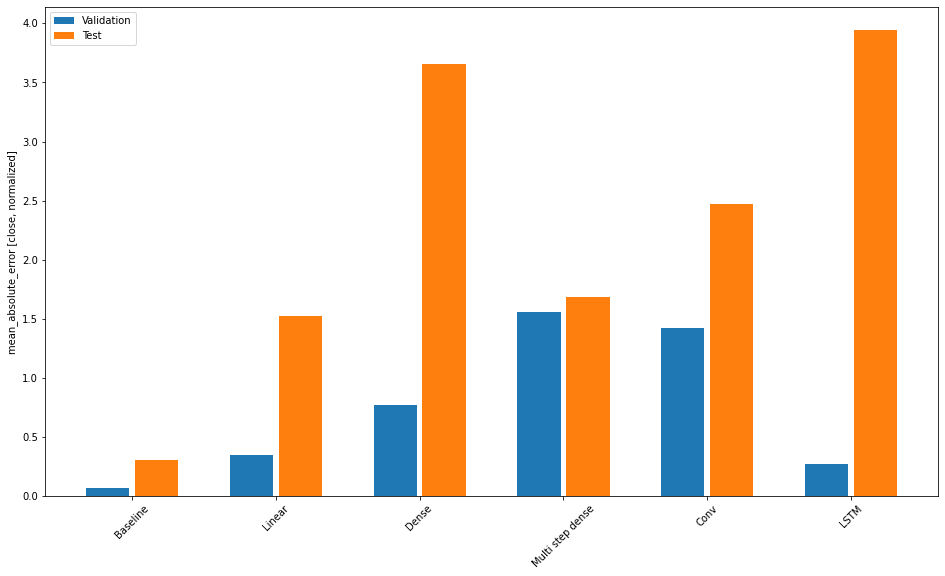

In [74]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [close, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [75]:
for name, value in performance.items():
    print(f'{name:12s}: {value[1]:0.4f}')

Baseline    : 0.3083
Linear      : 1.5274
Dense       : 3.6570
Multi step dense: 1.6829
Conv        : 2.4686
LSTM        : 3.9399


### Multi Output Models

In [76]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
    print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
    print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 7, 87)
Labels shape (batch, time, features): (32, 7, 87)


In [77]:
baseline = Baseline()
baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

In [78]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

16/16 [==============================] - 0s 2ms/step - loss: 0.0918 - mean_absolute_error: 0.1213


In [79]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [80]:
%%time
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test)

8/8 [==============================] - 0s 898us/step - loss: 4.5204 - mean_absolute_error: 1.6617
CPU times: user 20.3 s, sys: 4.75 s, total: 25 s
Wall time: 10.1 s


In [81]:
wide_window = WindowGenerator(
    input_width=7, label_width=7, shift=1)

In [82]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

In [83]:
%%time
history = compile_and_fit(lstm_model, wide_window)
IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)


16/16 [==============================] - 0s 3ms/step - loss: 2.1179 - mean_absolute_error: 1.0066
CPU times: user 33 s, sys: 7.67 s, total: 40.6 s
Wall time: 17.2 s


In [84]:
class ResidualWrapper(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def call(self, inputs, *args, **kwargs):
        delta = self.model(inputs, *args, **kwargs)

        # The prediction for each timestep is the input
        # from the previous time step plus the delta
        # calculated by the model.
        return inputs + delta

In [85]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small
        # So initialize the output layer with zeros
        kernel_initializer=tf.initializers.zeros)
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

16/16 [==============================] - 0s 4ms/step - loss: 0.0894 - mean_absolute_error: 0.1236

CPU times: user 9.8 s, sys: 2.01 s, total: 11.8 s
Wall time: 6.13 s


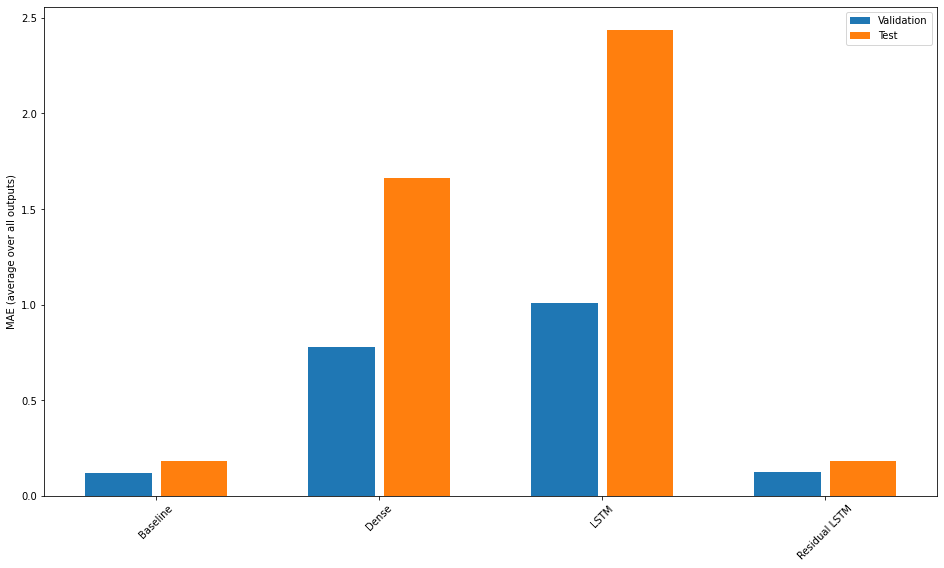

In [86]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

### Multi Step Models

Total window size: 14
Input indices: [0 1 2 3 4 5 6]
Label indices: [ 7  8  9 10 11 12 13]
Label column name(s): None

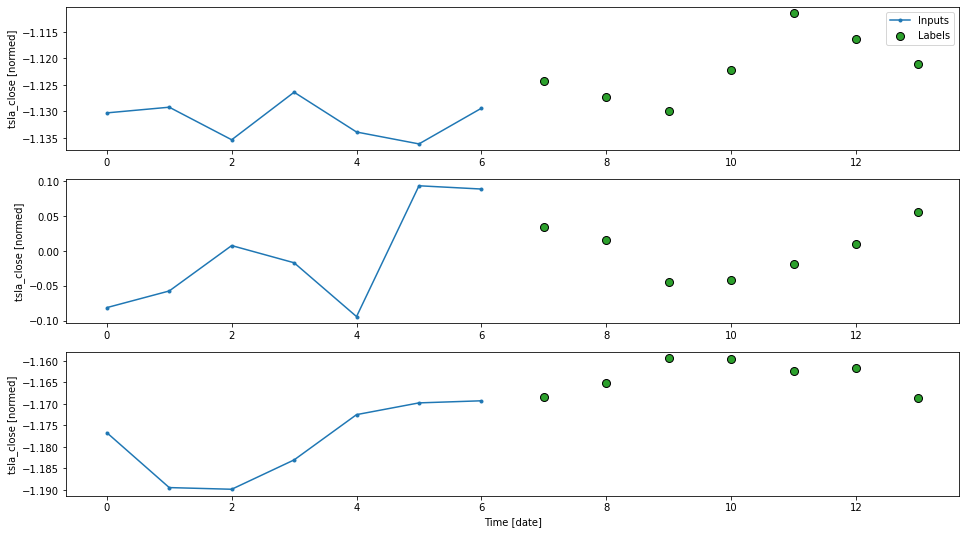

In [87]:
OUT_STEPS = 7
multi_window = WindowGenerator(input_width=7,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

16/16 [==============================] - 0s 2ms/step - loss: 0.1734 - mean_absolute_error: 0.1985


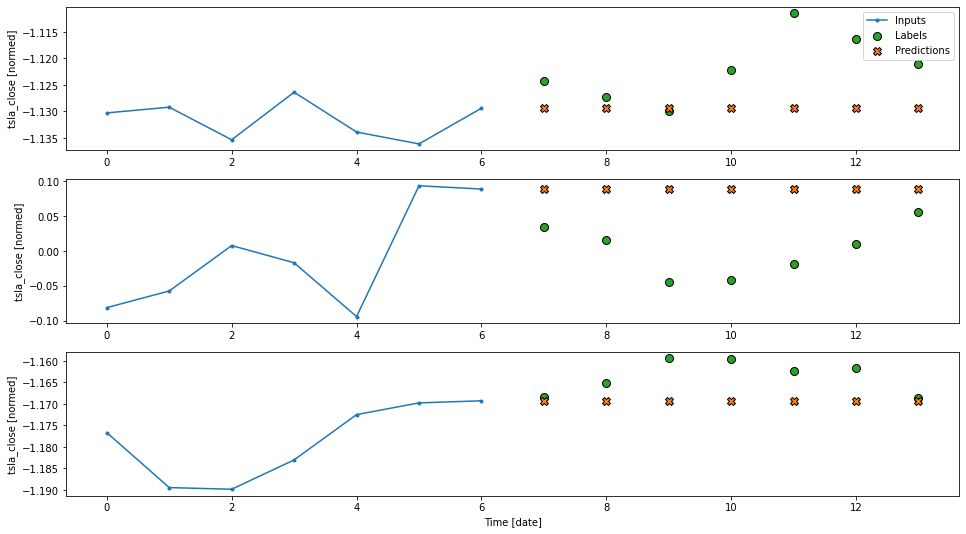

In [88]:
class MultiStepLastBaseline(tf.keras.Model):
    def call(self, inputs):
        return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.losses.MeanSquaredError(),
                      metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.val, verbose=0)
multi_window.plot(last_baseline)

16/16 [==============================] - 0s 2ms/step - loss: 0.2219 - mean_absolute_error: 0.2513


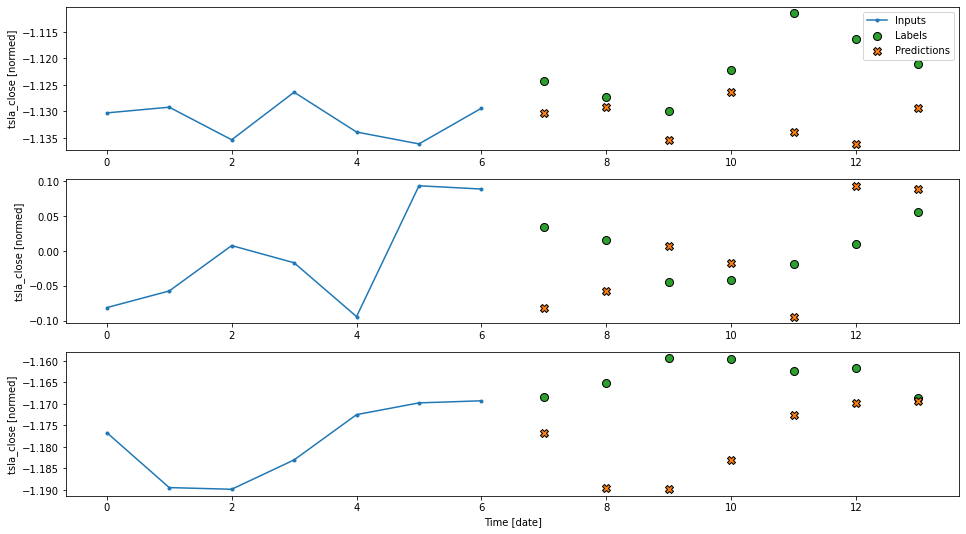

In [89]:
class RepeatBaseline(tf.keras.Model):
    def call(self, inputs):
        return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.losses.MeanSquaredError(),
                        metrics=[tf.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)

### Single-shot models

16/16 [==============================] - 0s 3ms/step - loss: 0.7065 - mean_absolute_error: 0.5966
CPU times: user 16.7 s, sys: 3.86 s, total: 20.5 s
Wall time: 8.2 s


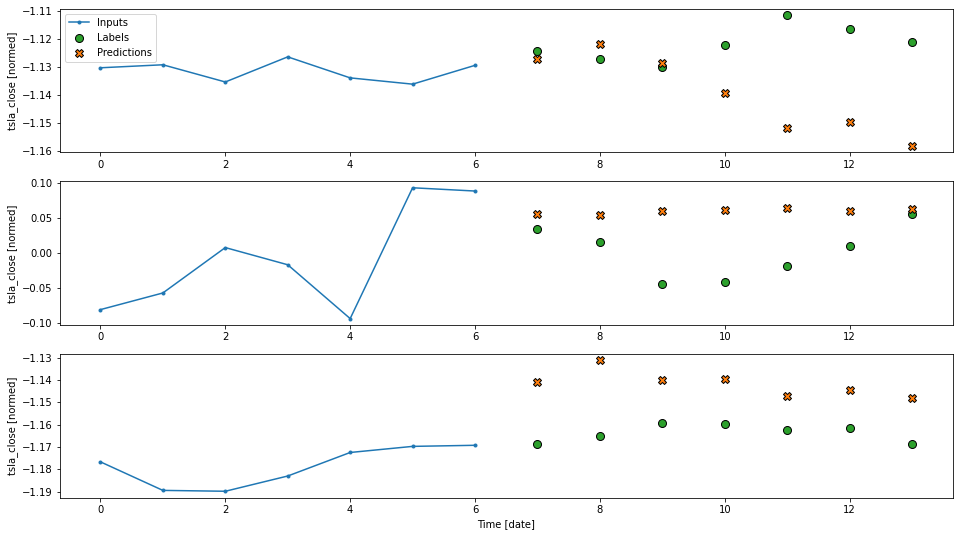

In [90]:
%%time
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)
IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

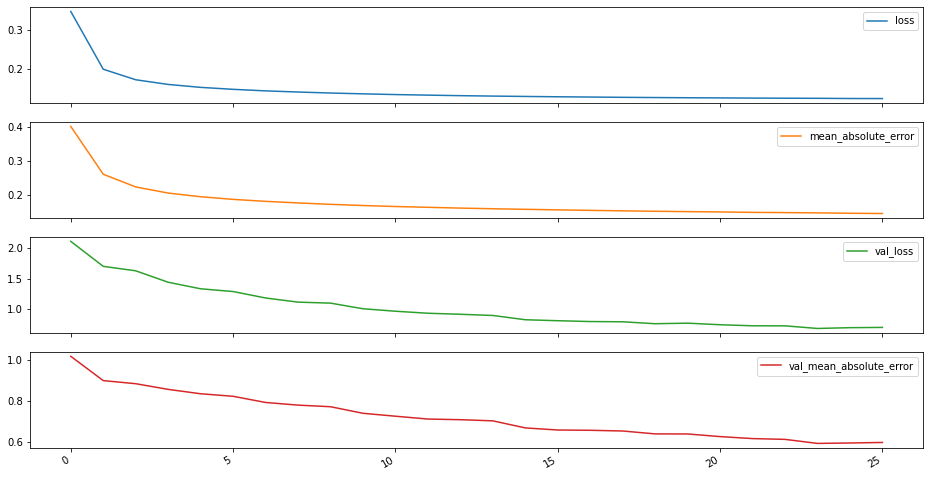

In [91]:
pd.DataFrame(history.history).plot(subplots=True)

### Dense
Adding a layers.Dense between the input and output gives the linear model more power, but is still only based on a single input timestep.

16/16 [==============================] - 0s 3ms/step - loss: 0.8400 - mean_absolute_error: 0.6693
CPU times: user 11.8 s, sys: 2.2 s, total: 14 s
Wall time: 5.4 s


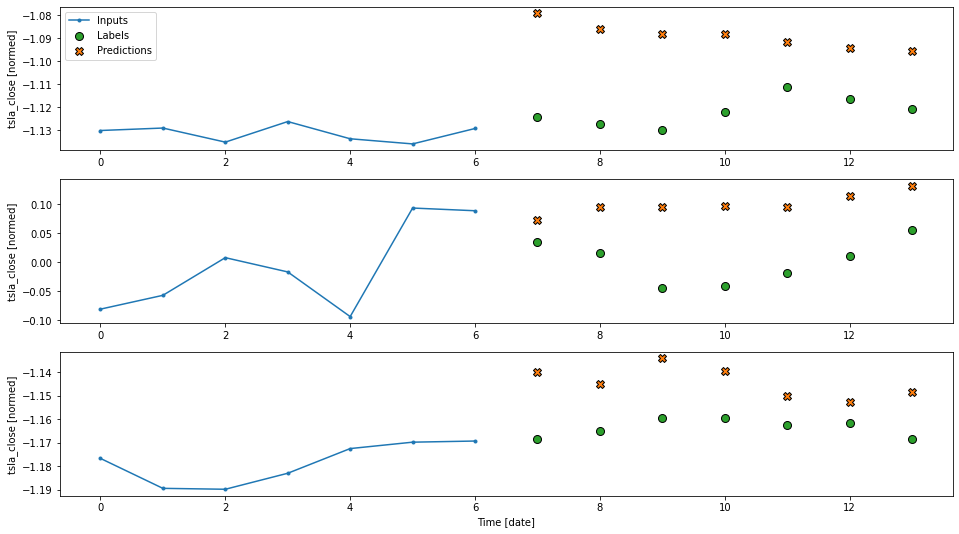

In [92]:
%%time
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

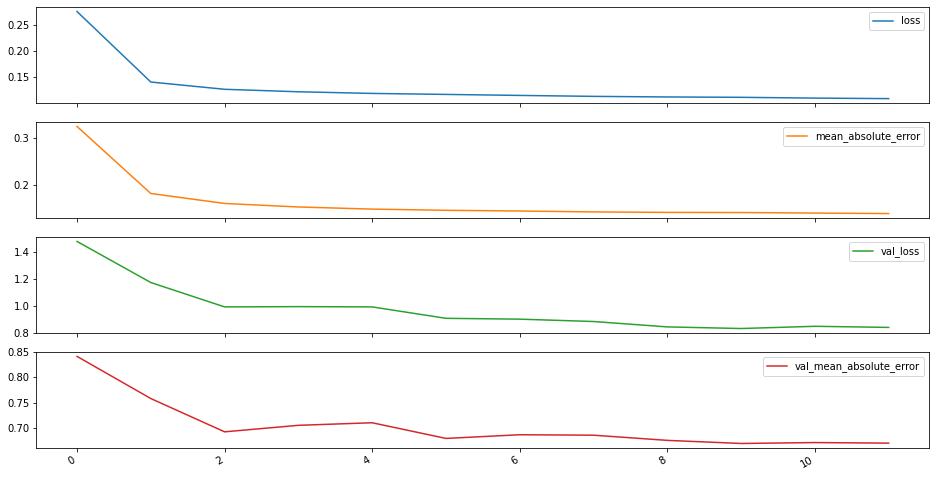

In [93]:
pd.DataFrame(history.history).plot(subplots=True)

### CNN

16/16 [==============================] - 0s 3ms/step - loss: 1.0773 - mean_absolute_error: 0.7683
CPU times: user 8.7 s, sys: 2.06 s, total: 10.8 s
Wall time: 4.2 s


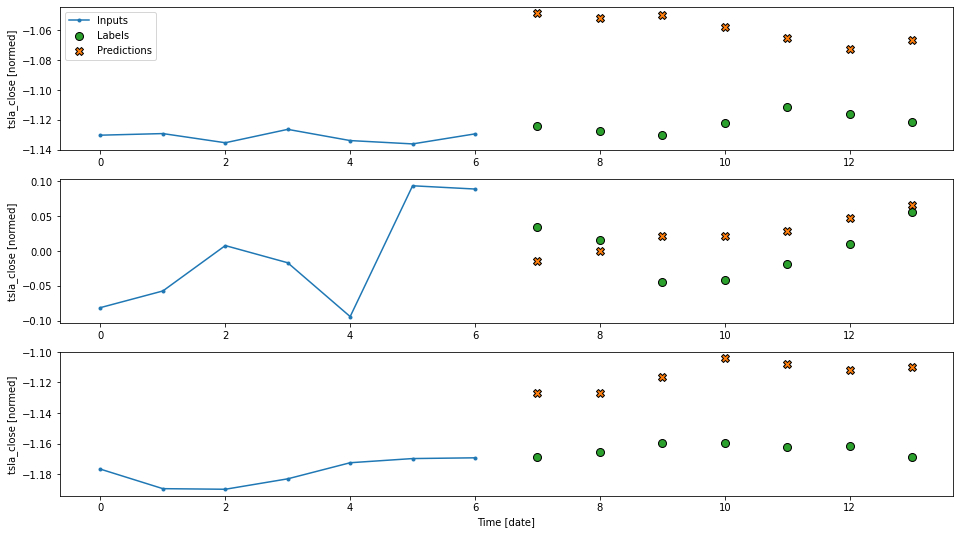

In [94]:
%%time
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

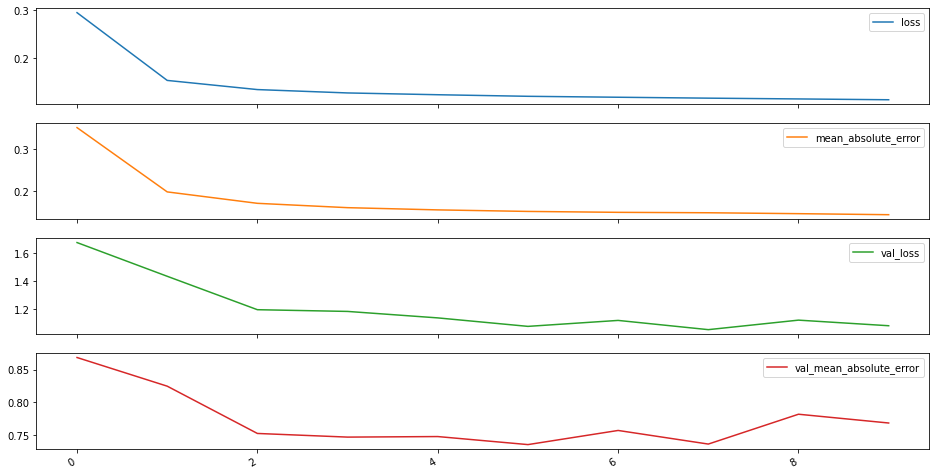

In [95]:
pd.DataFrame(history.history).plot(subplots=True)

### RNN

16/16 [==============================] - 0s 4ms/step - loss: 2.6413 - mean_absolute_error: 1.1452
CPU times: user 23.2 s, sys: 5.7 s, total: 28.9 s
Wall time: 12.1 s


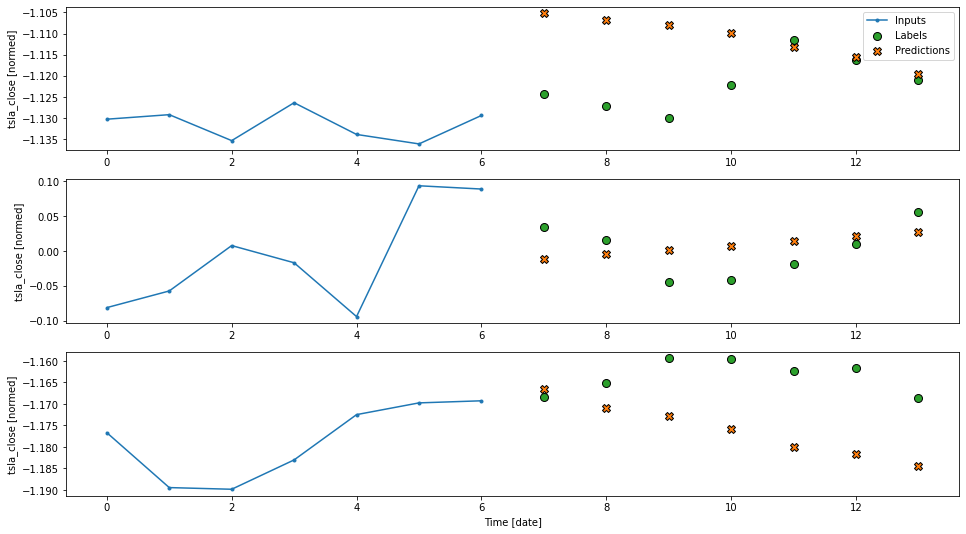

In [96]:
%%time
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

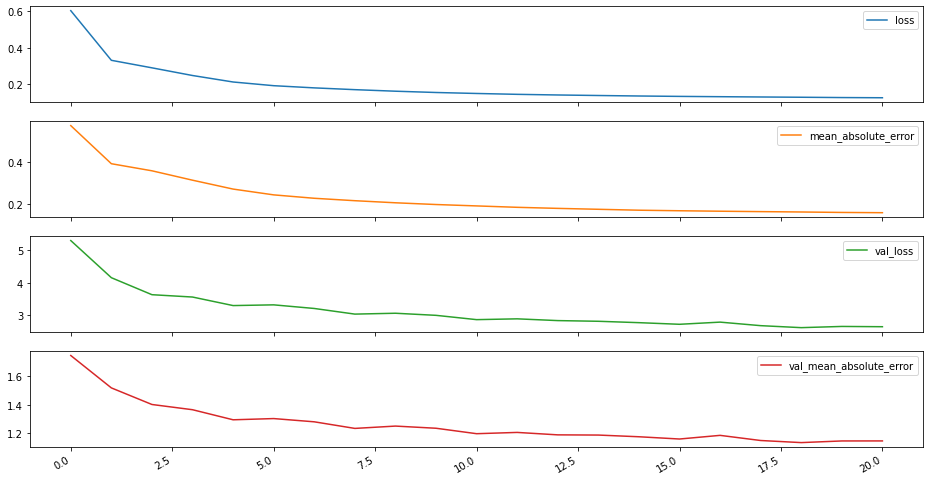

In [97]:
pd.DataFrame(history.history).plot(subplots=True)

### Advanced: Autoregressive model

#### RNN

In [98]:
class FeedBack(tf.keras.Model):
    def __init__(self, units, out_steps):
        super().__init__()
        self.out_steps = out_steps
        self.units = units
        self.lstm_cell = tf.keras.layers.LSTMCell(units)
        # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
        self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
        self.dense = tf.keras.layers.Dense(num_features)
   
    def warmup(self, inputs):
        # inputs.shape => (batch, time, features)
        # x.shape => (batch, lstm_units)
        x, *state = self.lstm_rnn(inputs)

        # predictions.shape => (batch, features)
        prediction = self.dense(x)
        return prediction, state
    
    def call(self, inputs, training=None):
        # Use a TensorArray to capture dynamically unrolled outputs.
        predictions = []
        # Initialize the lstm state
        prediction, state = self.warmup(inputs)

        # Insert the first prediction
        predictions.append(prediction)

        # Run the rest of the prediction steps
        for n in range(1, self.out_steps):
            # Use the last prediction as input.
            x = prediction
            # Execute one lstm step.
            x, state = self.lstm_cell(x, states=state,
                                      training=training)
            # Convert the lstm output to a prediction.
            prediction = self.dense(x)
            # Add the prediction to the output
            predictions.append(prediction)

        # predictions.shape => (time, batch, features)
        predictions = tf.stack(predictions)
        # predictions.shape => (batch, time, features)
        predictions = tf.transpose(predictions, [1, 0, 2])
        return predictions

In [99]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)

In [100]:
prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 87])

In [101]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)

Output shape (batch, time, features):  (32, 7, 87)


16/16 [==============================] - 0s 3ms/step - loss: 3.5664 - mean_absolute_error: 1.3672
CPU times: user 12.3 s, sys: 2.75 s, total: 15.1 s
Wall time: 6.98 s


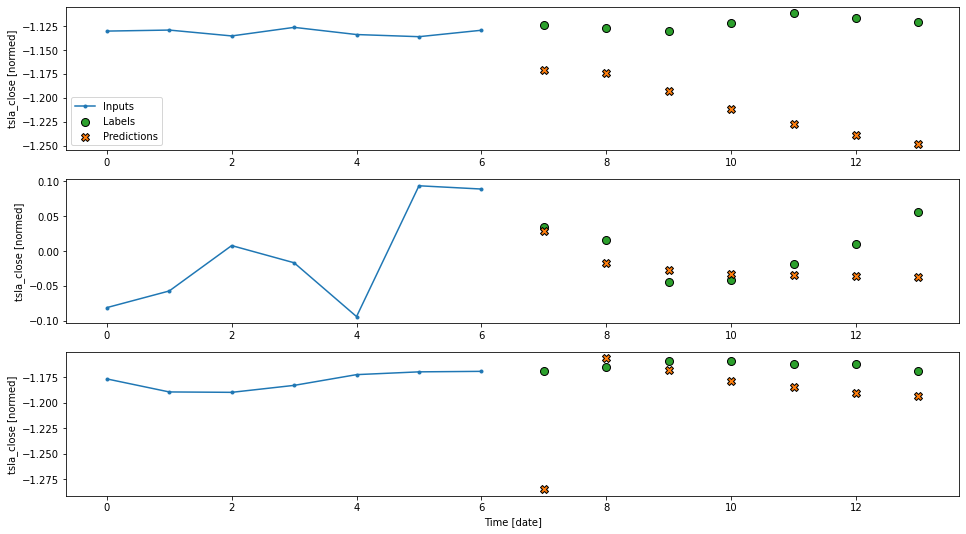

In [102]:
%%time
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

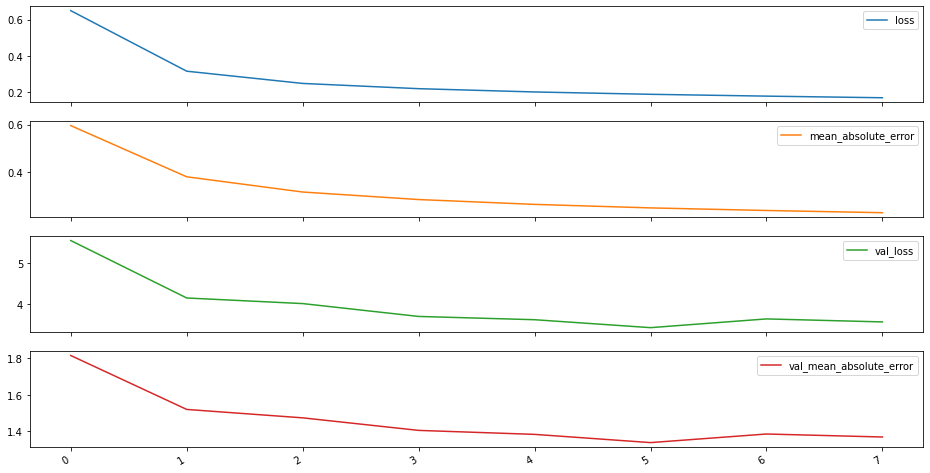

In [103]:
pd.DataFrame(history.history).plot(subplots=True)

### Reference Multi Step LSTM Models

[stacked-lstms-with-dropout](https://www.sciencedirect.com/science/article/pii/S1877050920304865)

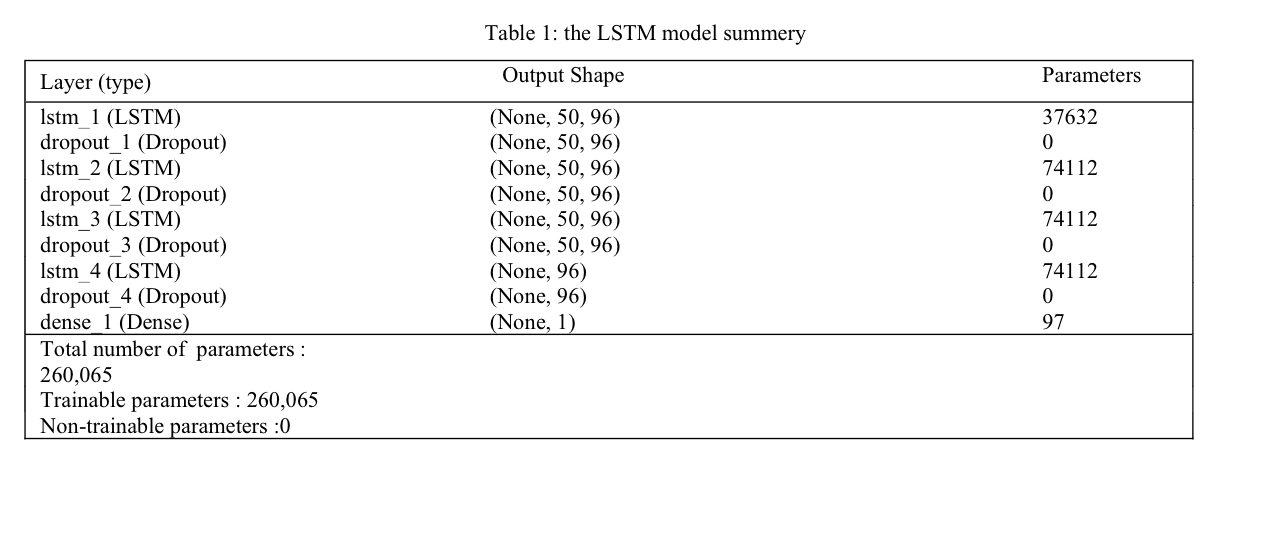

16/16 [==============================] - 0s 8ms/step - loss: 2.8252 - mean_absolute_error: 1.1996
CPU times: user 42.9 s, sys: 9.53 s, total: 52.4 s
Wall time: 21.2 s


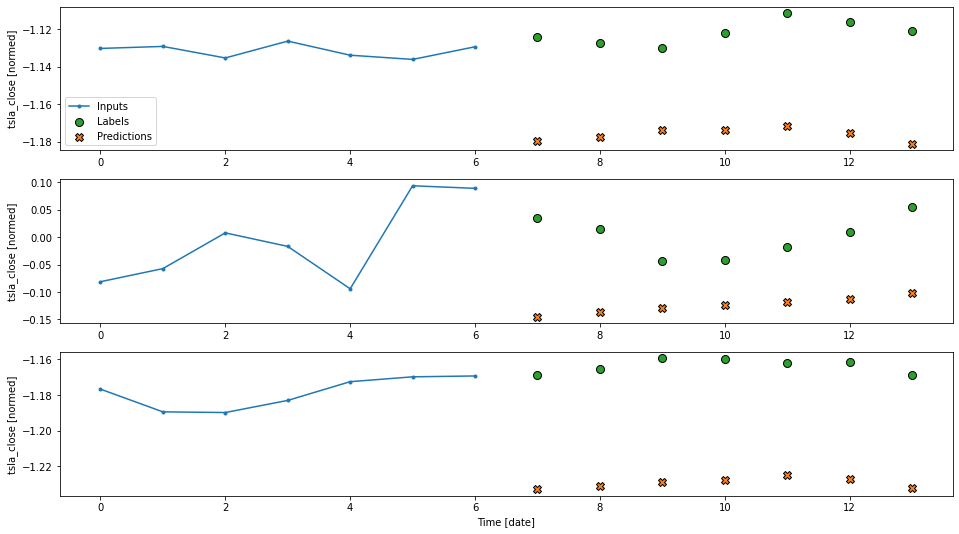

In [104]:
%%time
stacked_lstm_dropout_reference_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM(96, return_sequences=True),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.LSTM(96),
    tf.keras.layers.Dropout(0.20),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(stacked_lstm_dropout_reference_model, multi_window)

IPython.display.clear_output()
multi_val_performance['stacked_lstm_dropout_reference_model'] = stacked_lstm_dropout_reference_model.evaluate(multi_window.val)
multi_performance['stacked_lstm_dropout_reference_model'] = stacked_lstm_dropout_reference_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(stacked_lstm_dropout_reference_model)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

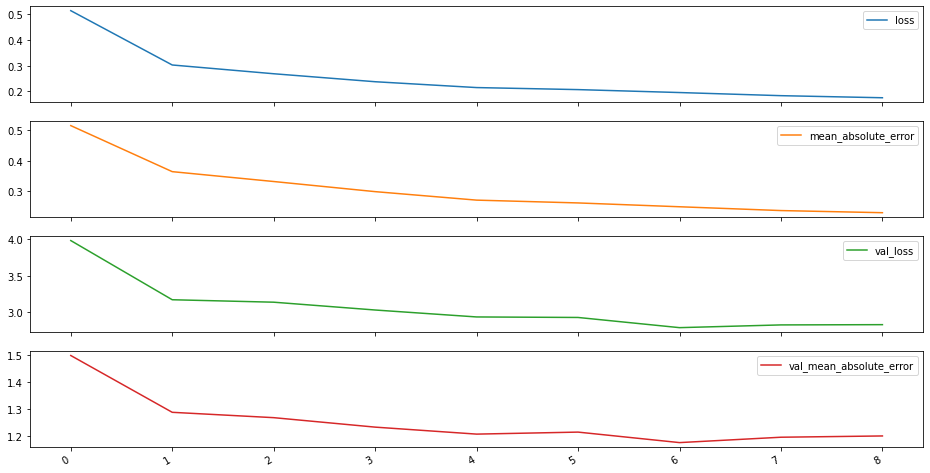

In [105]:
pd.DataFrame(history.history).plot(subplots=True)

### Custom Multi Step Models

Using a CNN with average pooling and dropout layer in front of stacked Bidirectional LSTM layers.

16/16 [==============================] - 0s 3ms/step - loss: 2.8252 - mean_absolute_error: 1.1960
CPU times: user 33.3 s, sys: 6.61 s, total: 39.9 s
Wall time: 17.6 s


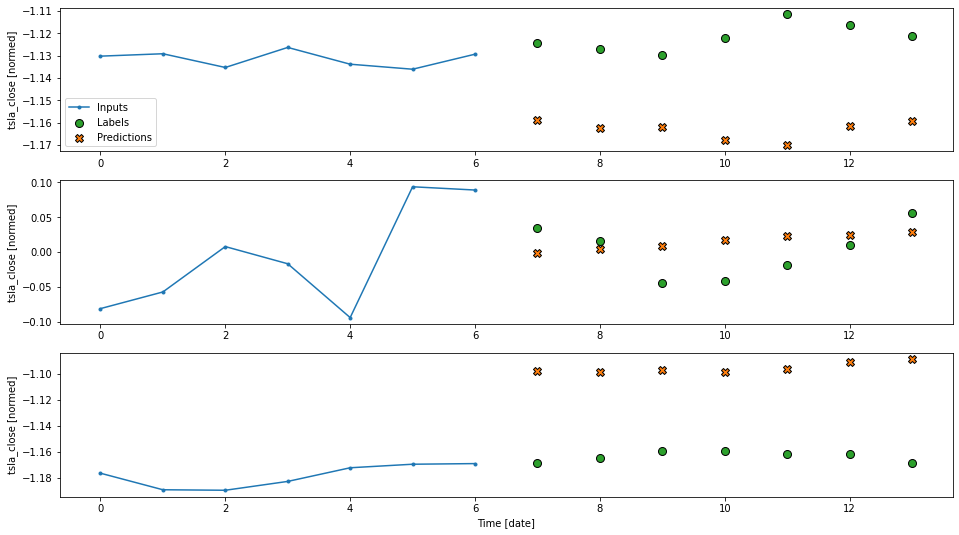

In [106]:
%%time
custom_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    tf.keras.layers.AveragePooling1D(1),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.20),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(custom_model, multi_window)

IPython.display.clear_output()
multi_val_performance['custom_model'] = custom_model.evaluate(multi_window.val)
multi_performance['custom_model'] = custom_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(custom_model)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

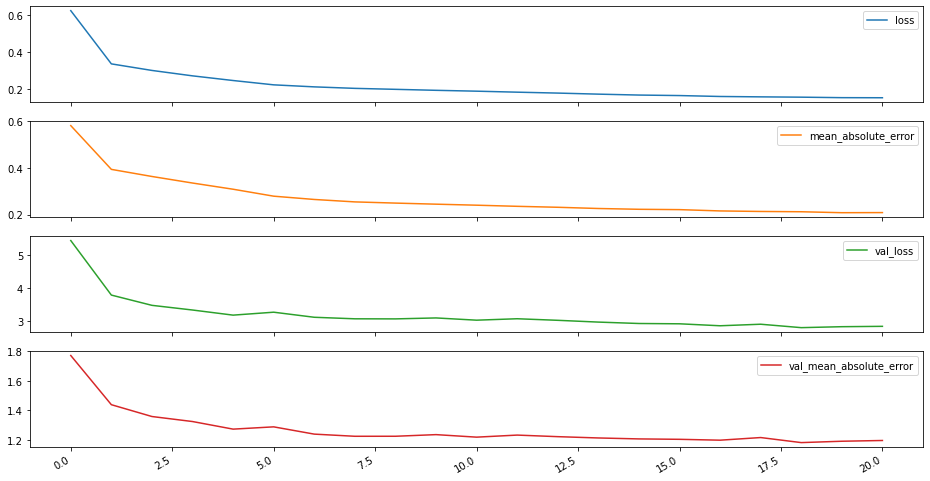

In [107]:
pd.DataFrame(history.history).plot(subplots=True)

### Performance

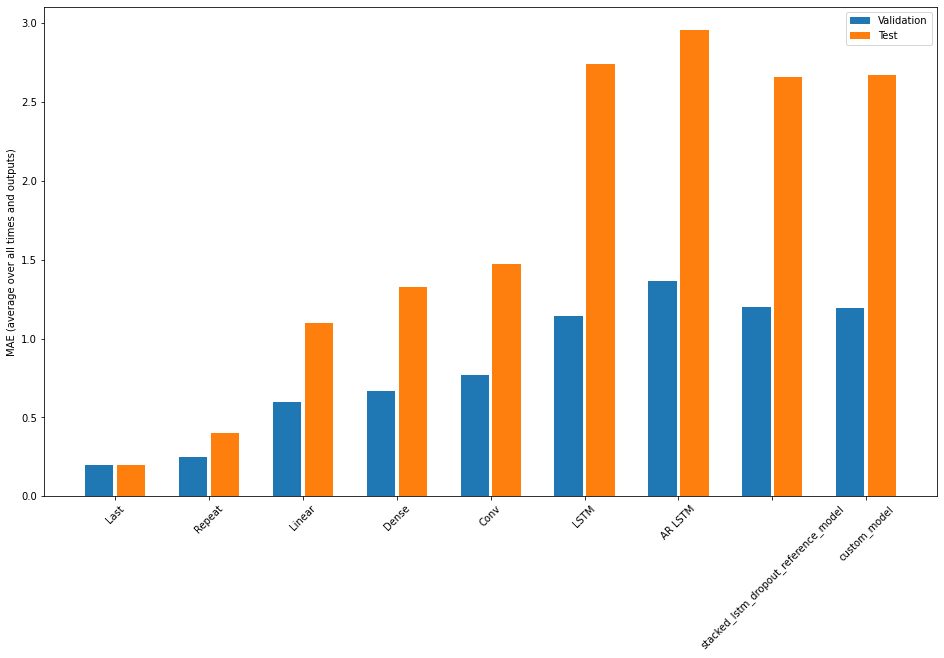

In [108]:
x = np.arange(len(multi_performance))
width = 0.3


metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

In [109]:
for name, value in multi_performance.items():
    print(f'{name:8s}: {value[1]:0.4f}')

Last    : 0.1985
Repeat  : 0.4035
Linear  : 1.0997
Dense   : 1.3244
Conv    : 1.4745
LSTM    : 2.7395
AR LSTM : 2.9554
stacked_lstm_dropout_reference_model: 2.6617
custom_model: 2.6695


Peeking at some other predictions made by the custom model... it predicts all features!

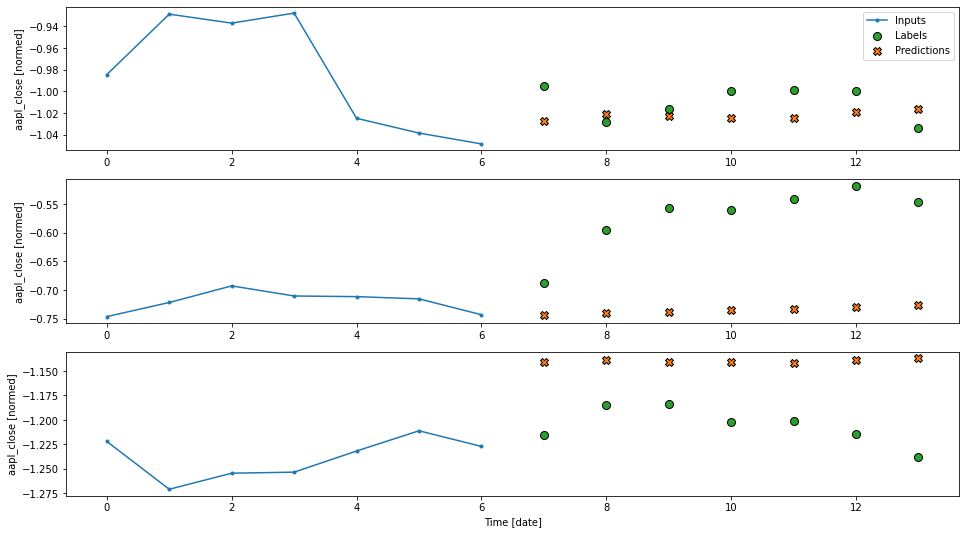

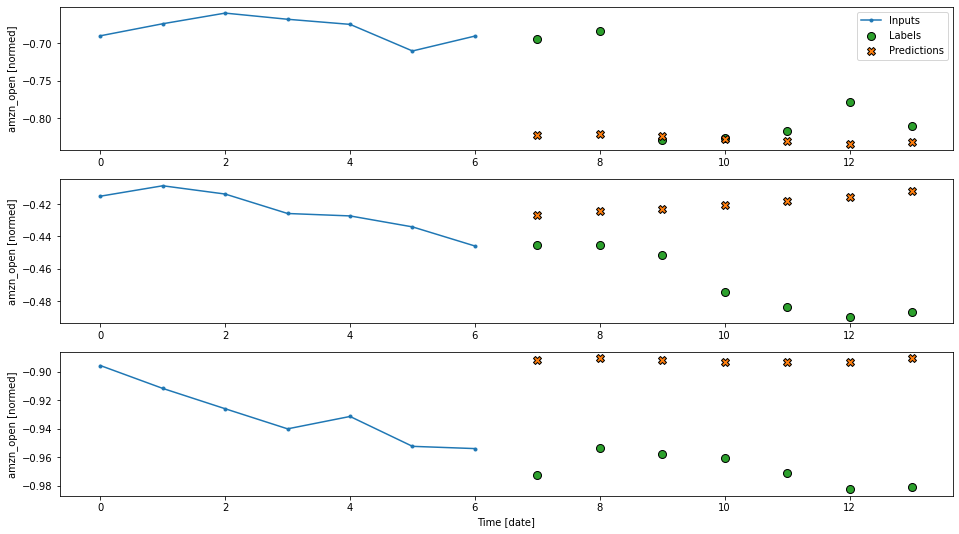

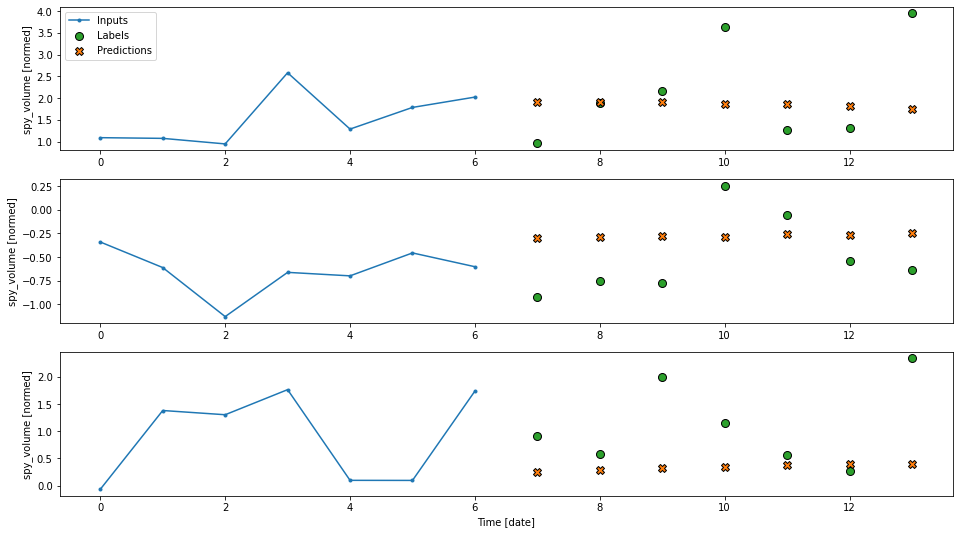

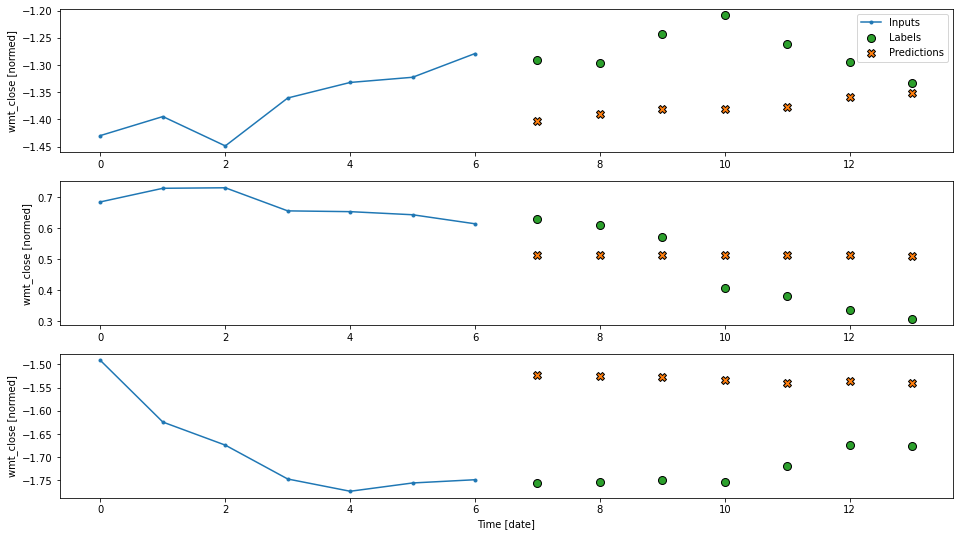

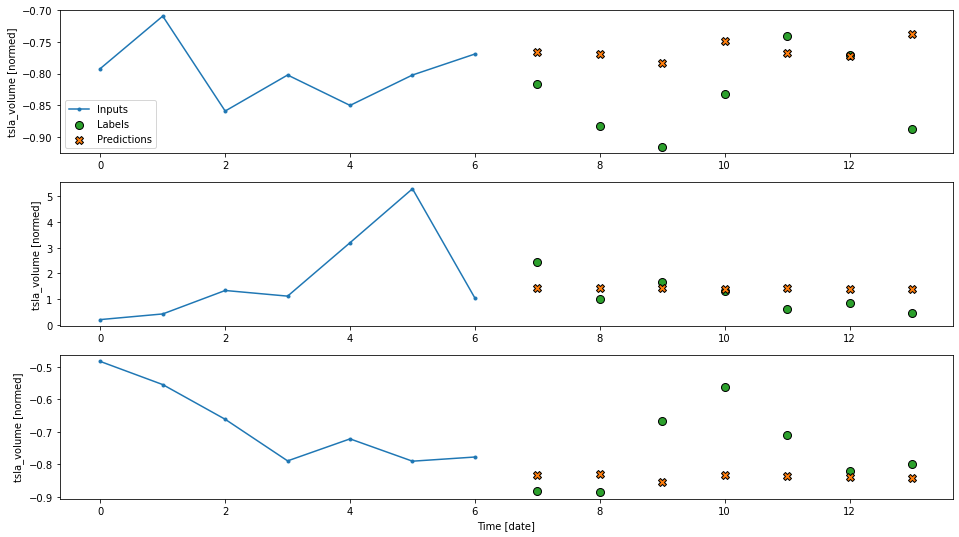

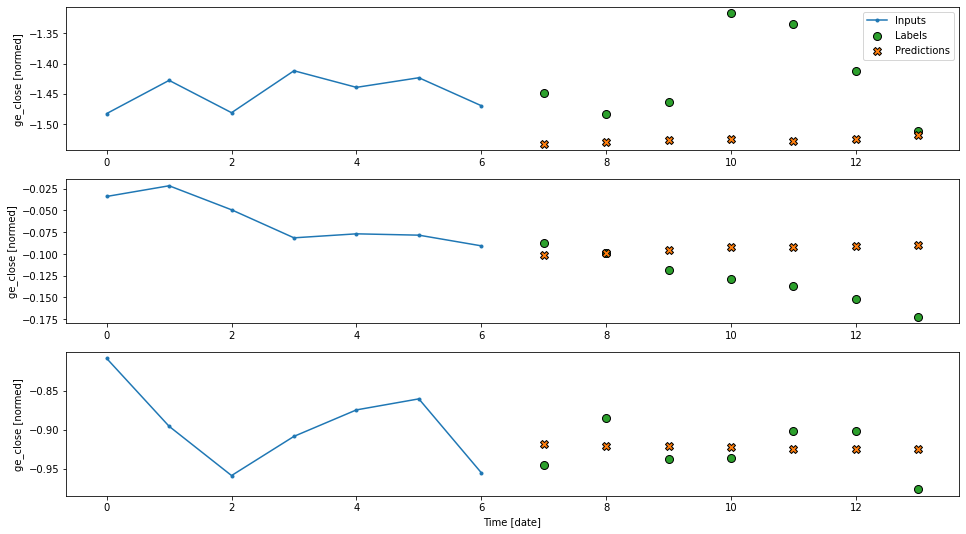

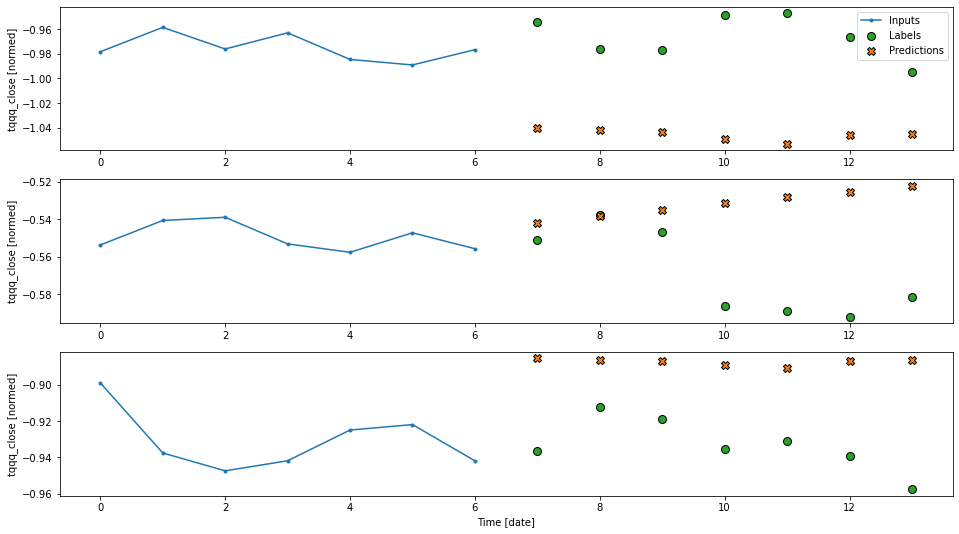

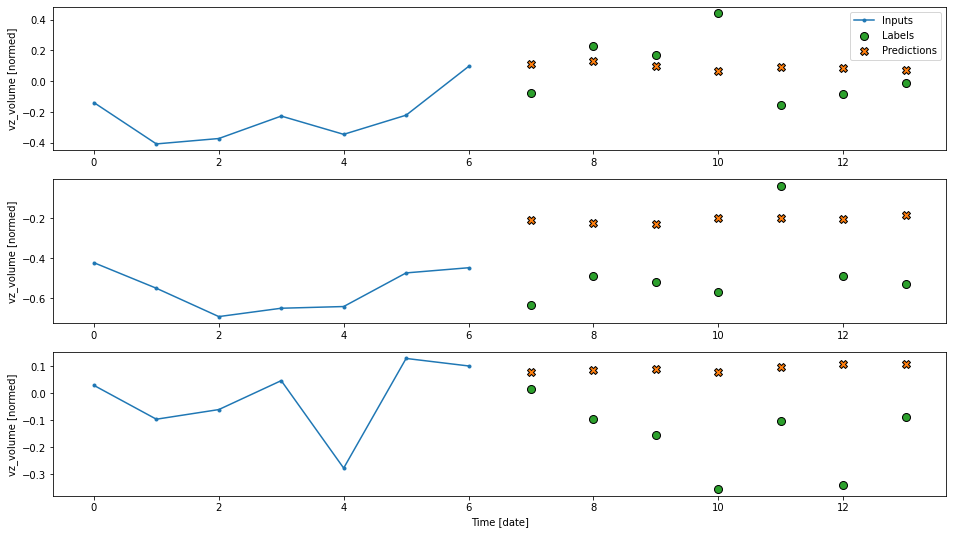

In [110]:
for plot_col in ['aapl_close', 'amzn_open', 'spy_volume', 'wmt_close', 'tsla_volume', 'ge_close', 'tqqq_close', 'vz_volume']:
    multi_window.plot(custom_model, plot_col)

Store the trained model weights

In [111]:
custom_model.save_weights('./checkpoints/custom-model')

### Making predictions with the saved model